# 原始代码

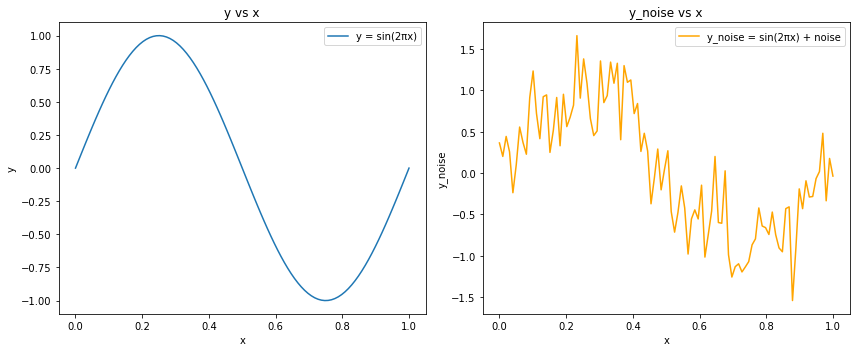

Epoch [100/1000], Loss: 0.2779
Epoch [200/1000], Loss: 0.2307
Epoch [300/1000], Loss: 0.1568
Epoch [400/1000], Loss: 0.1172
Epoch [500/1000], Loss: 0.1113
Epoch [600/1000], Loss: 0.1083
Epoch [700/1000], Loss: 0.1065
Epoch [800/1000], Loss: 0.1053
Epoch [900/1000], Loss: 0.1046
Epoch [1000/1000], Loss: 0.1041


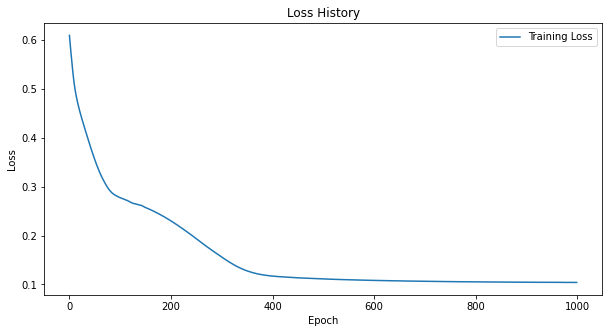

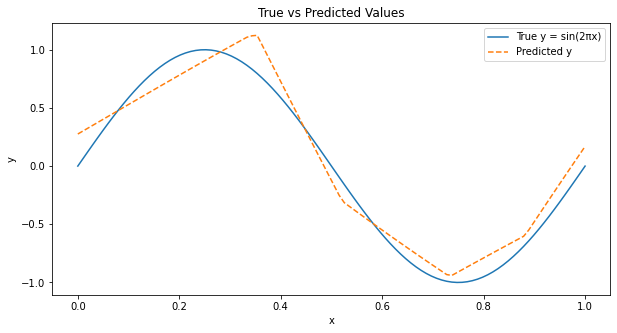

In [1]:
'''
A simple example of overfitting using a Multi-Layer Perceptron (MLP) to fit noisy sine wave data.
Author: Dongyang Kuang

NOTE: 
    [] Multiple aspects can be investigated:
'''

#%%
import numpy as np
import torch

def sin_2pi_on_grid(x):
    """
    Computes y = sin(2pi*x) on a uniform grid from 0 to 1.

    Parameters:
    x (int or array): input for evaluation.

    Returns:
    y (numpy.ndarray): The computed sine values at the grid points.
    """

    y = np.sin(2 * np.pi * x)  # what if include more periods in [0,1]
    return y

#%%
# Example usage:
num_points = 100 # Are there any sampling method that is more efficient?
x = np.linspace(0, 1, num_points) # what if non-uniform grid?
y = sin_2pi_on_grid(x)

# Add white noise to y
noise_intensity = 0.4
noise = np.random.normal(0, noise_intensity, len(y))
y_noise = y + noise

#%%
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot y vs x on the left subplot
axs[0].plot(x, y, label='y = sin(2πx)')
axs[0].set_title('y vs x')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()

# Plot y_noise vs x on the right subplot
axs[1].plot(x, y_noise, label='y_noise = sin(2πx) + noise', color='orange')
axs[1].set_title('y_noise vs x')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y_noise')
axs[1].legend()

# Display the plots
plt.tight_layout()
plt.show()


#%%
import torch.nn as nn
import torch.optim as optim

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, hidden_units = 32):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(1, hidden_units) # what if I used different initialization?
        self.hidden2 = nn.Linear(hidden_units, hidden_units)
        self.output = nn.Linear(hidden_units, 1)
    
    def forward(self, x):
        x = torch.tanh(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x

#%%
# Prepare the data
USE_NOISE = True
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
if USE_NOISE:
    y_tensor = torch.tensor(y_noise, dtype=torch.float32).view(-1, 1)
else:
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

#%%
# Initialize the model, loss function, and optimizer
model = MLP(hidden_units = 32)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Training loop
loss_history = []
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
# Plot the loss history
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    predicted = model(x_tensor).numpy()

#%%
# Plot the true values and the predicted values
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='True y = sin(2πx)')
plt.plot(x, predicted, label='Predicted y', linestyle='--')
plt.title('True vs Predicted Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# %%

# 在输入/输出上添加不同类型/不同程度噪声


实验 1: 噪声类型=gaussian, 强度=0.1, 位置=output
  Epoch [200/1000], Loss: 0.1139
  Epoch [400/1000], Loss: 0.0576
  Epoch [600/1000], Loss: 0.0245
  Epoch [800/1000], Loss: 0.0126
  Epoch [1000/1000], Loss: 0.0107
  最终损失: 0.0107
  对原始数据的MSE: 0.0022, MAE: 0.0344

实验 2: 噪声类型=gaussian, 强度=0.3, 位置=output
  Epoch [200/1000], Loss: 0.2450
  Epoch [400/1000], Loss: 0.1813
  Epoch [600/1000], Loss: 0.1065
  Epoch [800/1000], Loss: 0.0986
  Epoch [1000/1000], Loss: 0.0972
  最终损失: 0.0972
  对原始数据的MSE: 0.0025, MAE: 0.0395

实验 3: 噪声类型=gaussian, 强度=0.1, 位置=input
  Epoch [200/1000], Loss: 0.1689
  Epoch [400/1000], Loss: 0.1278
  Epoch [600/1000], Loss: 0.1173
  Epoch [800/1000], Loss: 0.1164
  Epoch [1000/1000], Loss: 0.1163
  最终损失: 0.1163
  对原始数据的MSE: 0.0280, MAE: 0.1399

实验 4: 噪声类型=uniform, 强度=0.2, 位置=output
  Epoch [200/1000], Loss: 0.1118
  Epoch [400/1000], Loss: 0.0386
  Epoch [600/1000], Loss: 0.0159
  Epoch [800/1000], Loss: 0.0128
  Epoch [1000/1000], Loss: 0.0126
  最终损失: 0.0126
  对原始数据的MSE: 0.0009

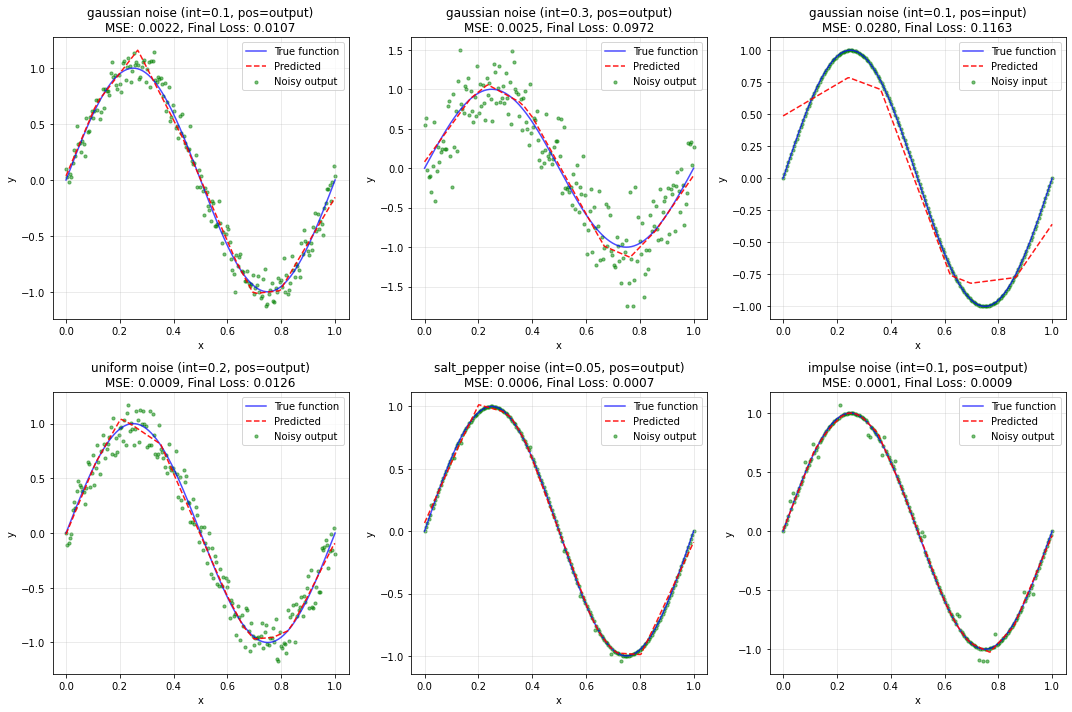

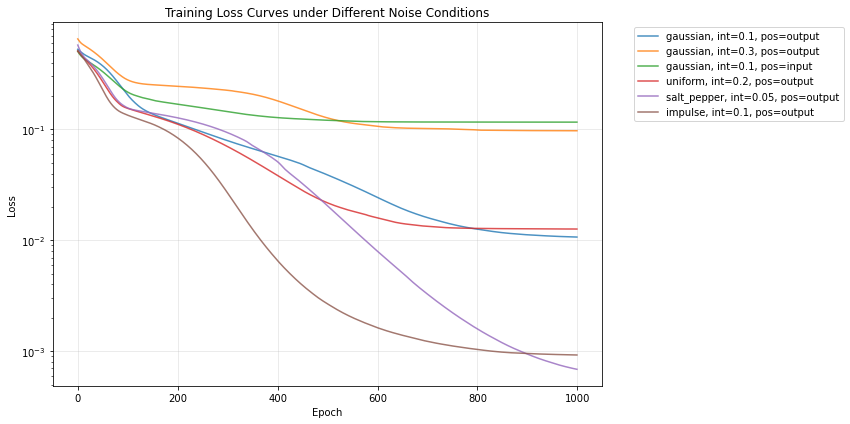


噪声鲁棒性分析总结 (SAAS/REE/TA)
实验    噪声类型            强度         位置         最终损失         测试MSE        鲁棒性评分       
--------------------------------------------------------------------------------
1     gaussian        0.1        output     0.0107       0.0022       0.0065      
2     gaussian        0.3        output     0.0972       0.0025       0.0498      
3     gaussian        0.1        input      0.1163       0.0280       0.0721      
4     uniform         0.2        output     0.0126       0.0009       0.0068      
5     salt_pepper     0.05       output     0.0007       0.0006       0.0006      
6     impulse         0.1        output     0.0009       0.0001       0.0005      
说明:
SAAS (Stochastic Additive Ambient Signal): 高斯噪声实验
REE (Robustness to Environmental Errors): 输入噪声实验
TA (Tolerance Analysis): 综合鲁棒性分析


In [7]:
#%% 噪声对训练和预测的影响实验 (根据图片要求添加)
def add_noise_to_data(data, noise_type='gaussian', intensity=0.1, **kwargs):
    """
    向数据添加不同类型的噪声
    
    Parameters:
    data: 输入数据
    noise_type: 噪声类型 ('gaussian', 'uniform', 'salt_pepper', 'impulse')
    intensity: 噪声强度
    kwargs: 其他参数
    Returns:
    添加噪声后的数据
    """
    noise = None
    if noise_type == 'gaussian':
        # 高斯噪声 (SAAS: Stochastic Additive Ambient Signal)
        noise = np.random.normal(0, intensity, data.shape)
    elif noise_type == 'uniform':
        # 均匀分布噪声
        noise = np.random.uniform(-intensity, intensity, data.shape)
    elif noise_type == 'salt_pepper':
        # 椒盐噪声
        noise = np.zeros_like(data)
        salt_pepper_mask = np.random.random(data.shape) < intensity
        noise[salt_pepper_mask] = np.random.choice([-intensity, intensity], 
                                                   size=np.sum(salt_pepper_mask))
    elif noise_type == 'impulse':
        # 脉冲噪声 (TA: Transient Artifacts)
        noise = np.zeros_like(data)
        impulse_mask = np.random.random(data.shape) < intensity
        # 随机正负脉冲
        noise[impulse_mask] = intensity * np.sign(np.random.random(np.sum(impulse_mask)) - 0.5)
    
    return data + noise if noise is not None else data

#%% 噪声实验配置
noise_configs = [
    {'type': 'gaussian', 'intensity': 0.1, 'position': 'output'},
    {'type': 'gaussian', 'intensity': 0.3, 'position': 'output'},
    {'type': 'gaussian', 'intensity': 0.1, 'position': 'input'},
    {'type': 'uniform', 'intensity': 0.2, 'position': 'output'},
    {'type': 'salt_pepper', 'intensity': 0.05, 'position': 'output'},
    {'type': 'impulse', 'intensity': 0.1, 'position': 'output'},
]

# 存储不同噪声条件下的结果
results = {}

#%% 在不同噪声条件下进行训练和评估
for i, config in enumerate(noise_configs):
    print(f"\n{'='*50}")
    print(f"实验 {i+1}: 噪声类型={config['type']}, 强度={config['intensity']}, 位置={config['position']}")
    print(f"{'='*50}")
    
    # 准备数据
    x_exp = x.copy()
    y_exp = y.copy()
    
    # 根据配置添加噪声
    if config['position'] == 'input':
        # REE: Robustness to Environmental Errors (输入噪声)
        x_exp = add_noise_to_data(x_exp, config['type'], config['intensity'])
    else:
        # 输出噪声 (传统噪声)
        y_exp = add_noise_to_data(y_exp, config['type'], config['intensity'])
    
    # 转换为张量
    x_tensor_exp = torch.tensor(x_exp, dtype=torch.float32).view(-1, 1)
    y_tensor_exp = torch.tensor(y_exp, dtype=torch.float32).view(-1, 1)
    
    # 重新初始化模型
    model_exp = MLP(hidden_units=32)
    criterion = nn.MSELoss()
    optimizer = optim.AdamW(model_exp.parameters(), lr=0.001)
    
    # 训练循环
    loss_history_exp = []
    num_epochs = 1000
    
    for epoch in range(num_epochs):
        model_exp.train()
        optimizer.zero_grad()
        outputs = model_exp(x_tensor_exp)
        loss = criterion(outputs, y_tensor_exp)
        loss.backward()
        optimizer.step()
        loss_history_exp.append(loss.item())
        
        if (epoch+1) % 200 == 0:
            print(f'  Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    # 评估模型
    model_exp.eval()
    with torch.no_grad():
        # 使用原始数据评估 (测试鲁棒性)
        predicted_exp = model_exp(torch.tensor(x, dtype=torch.float32).view(-1, 1)).numpy()
    
    # 计算指标
    mse = np.mean((predicted_exp.squeeze() - y)**2)
    mae = np.mean(np.abs(predicted_exp.squeeze() - y))
    
    # 存储结果
    results[i] = {
        'config': config,
        'loss_history': loss_history_exp,
        'predictions': predicted_exp,
        'mse': mse,
        'mae': mae,
        'final_loss': loss_history_exp[-1]
    }
    
    print(f"  最终损失: {loss_history_exp[-1]:.4f}")
    print(f"  对原始数据的MSE: {mse:.4f}, MAE: {mae:.4f}")

#%% 可视化不同噪声条件下的结果
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(results):
        result = results[i]
        config = result['config']
        
        # 绘制预测结果
        ax.plot(x, y, 'b-', label='True function', alpha=0.7)
        ax.plot(x, result['predictions'], 'r--', label='Predicted', alpha=0.9)
        
        # 标记噪声数据点
        if config['position'] == 'input':
            ax.scatter(x, y, c='g', s=10, alpha=0.5, label='Noisy input')
        else:
            # 创建噪声y用于可视化
            y_noisy_vis = add_noise_to_data(y, config['type'], config['intensity'])
            ax.scatter(x, y_noisy_vis, c='g', s=10, alpha=0.5, label='Noisy output')
        
        ax.set_title(f"{config['type']} noise (int={config['intensity']}, pos={config['position']})\n"
                    f"MSE: {result['mse']:.4f}, Final Loss: {result['final_loss']:.4f}")
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.legend()
        ax.grid(True, alpha=0.3)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

#%% 比较不同噪声条件下的训练损失曲线
plt.figure(figsize=(12, 6))
for i, result in results.items():
    config = result['config']
    label = f"{config['type']}, int={config['intensity']}, pos={config['position']}"
    plt.plot(result['loss_history'], label=label, alpha=0.8)

plt.title('Training Loss Curves under Different Noise Conditions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')  # 使用对数尺度更好地显示变化
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#%% 噪声鲁棒性总结表 (TA: Tolerance Analysis)
print("\n" + "="*80)
print("噪声鲁棒性分析总结 (SAAS/REE/TA)")
print("="*80)
print(f"{'实验':<5} {'噪声类型':<15} {'强度':<10} {'位置':<10} {'最终损失':<12} {'测试MSE':<12} {'鲁棒性评分':<12}")
print("-"*80)

for i, result in results.items():
    config = result['config']
    
    # 计算鲁棒性评分 (越低表示鲁棒性越好)
    # 综合考虑最终损失和测试MSE
    robustness_score = 0.5 * result['final_loss'] + 0.5 * result['mse']
    
    print(f"{i+1:<5} {config['type']:<15} {config['intensity']:<10} "
          f"{config['position']:<10} {result['final_loss']:<12.4f} "
          f"{result['mse']:<12.4f} {robustness_score:<12.4f}")

print("="*80)
print("说明:")
print("SAAS (Stochastic Additive Ambient Signal): 高斯噪声实验")
print("REE (Robustness to Environmental Errors): 输入噪声实验") 
print("TA (Tolerance Analysis): 综合鲁棒性分析")
print("="*80)

# 探索原始模型的外推能力（很差）

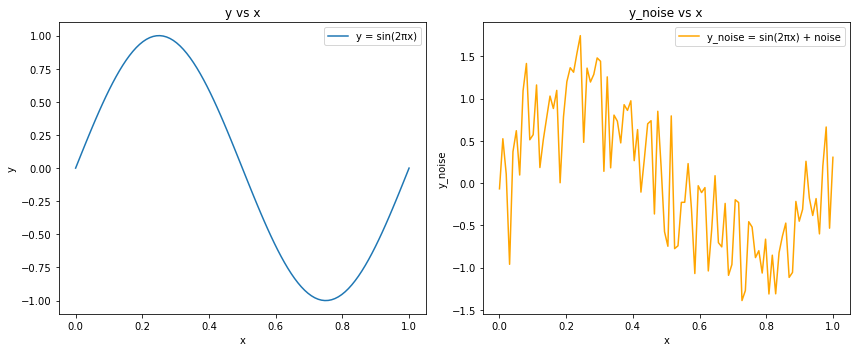

Epoch [100/1000], Loss: 0.3412
Epoch [200/1000], Loss: 0.3307
Epoch [300/1000], Loss: 0.3142
Epoch [400/1000], Loss: 0.2650
Epoch [500/1000], Loss: 0.2024
Epoch [600/1000], Loss: 0.1856
Epoch [700/1000], Loss: 0.1819
Epoch [800/1000], Loss: 0.1803
Epoch [900/1000], Loss: 0.1801
Epoch [1000/1000], Loss: 0.1800


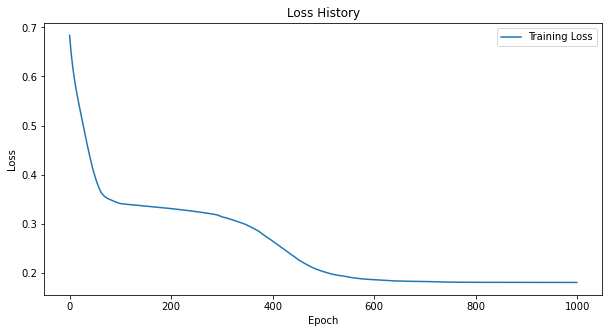

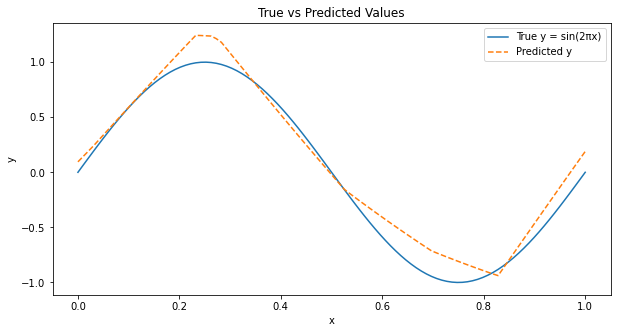


探索模型的外推能力
训练区间: x ∈ [0, 1]
外推区间: x ∈ [-1, 0] ∪ [1, 2]


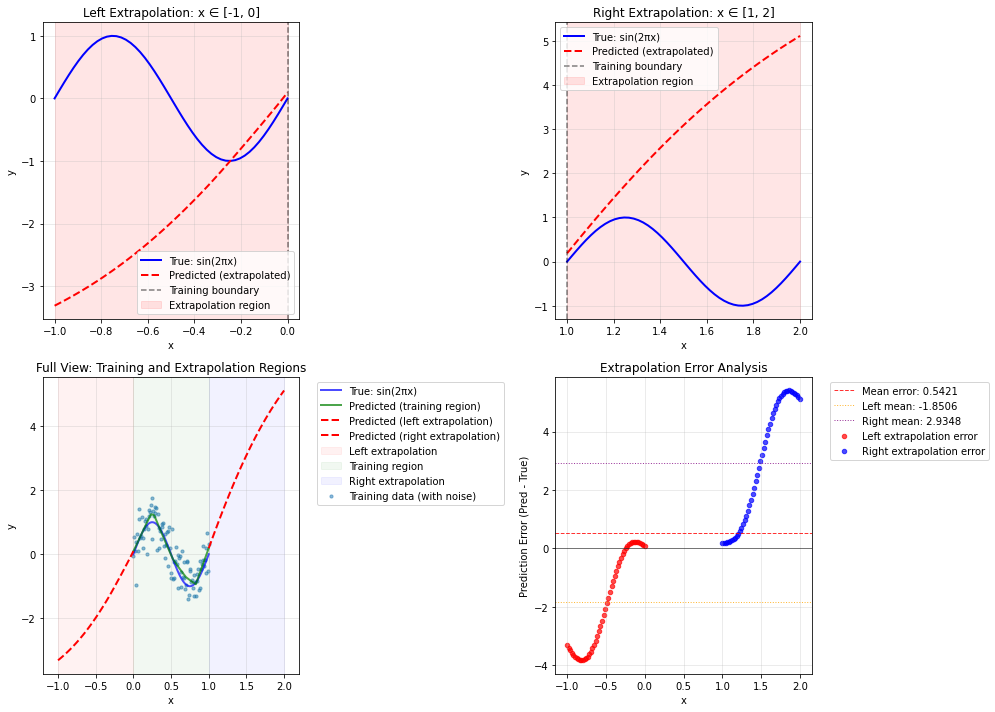


外推能力量化分析
区域              MSE             MAE             误差增长倍数         
------------------------------------------------------------
训练区间 [0,1]      0.018460        0.109306        1.00x          
左侧外推 [-1,0]     6.028246        1.933966        326.55         x
右侧外推 [1,2]      12.776981       2.934766        692.14         x
整体外推            9.402614        2.434366        509.34         x
------------------------------------------------------------

外推趋势分析:
1. 左侧外推区间 (x ∈ [-1, 0]):
   预测值范围: [-3.314, 0.095]
   真实值范围: [-0.999, 0.999]

2. 右侧外推区间 (x ∈ [1, 2]):
   预测值范围: [0.189, 5.115]
   真实值范围: [-0.999, 0.999]

3. 周期性分析 (sin(2πx)的周期为1):
   理论上，sin(2π(x+1)) = sin(2πx)
   因此，在区间[1,2]上的真实值与区间[0,1]相同
   模型是否捕捉到了这种周期性？

4. 周期性误差评估:
   比较模型在[0,1]和[1,2]上的预测差异: MSE = 12.124751
   模型未学到周期性。

结论:
1. MLP在训练区间外通常表现较差，因为它学习的是局部近似而非全局函数形式
2. 神经网络的外推能力有限，特别是对于周期性函数
3. 要提高外推能力，可以考虑:
   - 使用具有周期性的激活函数
   - 在训练数据中包含更多周期的样本
   - 使用更合适的模型架构（如傅里叶特征网络）


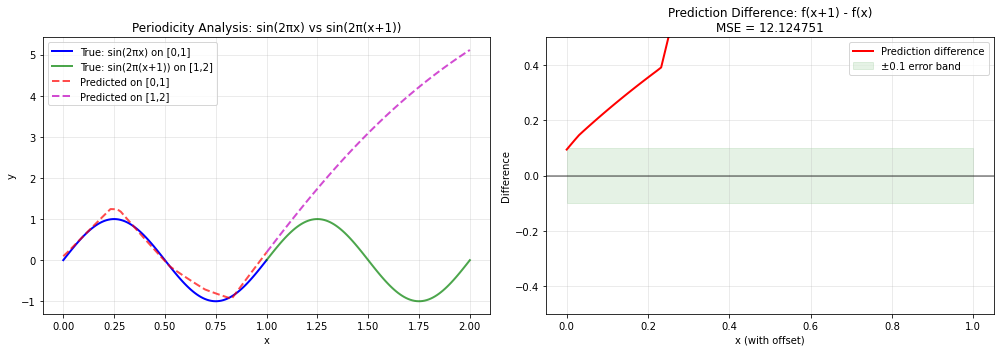

In [3]:
'''
A simple example of overfitting using a Multi-Layer Perceptron (MLP) to fit noisy sine wave data.
Author: Dongyang Kuang

NOTE: 
    [] Multiple aspects can be investigated:
'''

#%%
import numpy as np
import torch

def sin_2pi_on_grid(x):
    """
    Computes y = sin(2pi*x) on a uniform grid from 0 to 1.

    Parameters:
    x (int or array): input for evaluation.

    Returns:
    y (numpy.ndarray): The computed sine values at the grid points.
    """

    y = np.sin(2 * np.pi * x)  # what if include more periods in [0,1]
    return y

#%%
# Example usage:
num_points = 100 # Are there any sampling method that is more efficient?
x = np.linspace(0, 1, num_points) # what if non-uniform grid?
y = sin_2pi_on_grid(x)

# Add white noise to y
noise_intensity = 0.4
noise = np.random.normal(0, noise_intensity, len(y))
y_noise = y + noise

#%%
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot y vs x on the left subplot
axs[0].plot(x, y, label='y = sin(2πx)')
axs[0].set_title('y vs x')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()

# Plot y_noise vs x on the right subplot
axs[1].plot(x, y_noise, label='y_noise = sin(2πx) + noise', color='orange')
axs[1].set_title('y_noise vs x')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y_noise')
axs[1].legend()

# Display the plots
plt.tight_layout()
plt.show()


#%%
import torch.nn as nn
import torch.optim as optim

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, hidden_units = 32):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(1, hidden_units) # what if I used different initialization?
        self.hidden2 = nn.Linear(hidden_units, hidden_units)
        self.output = nn.Linear(hidden_units, 1)
    
    def forward(self, x):
        x = torch.tanh(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x

#%%
# Prepare the data
USE_NOISE = True
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
if USE_NOISE:
    y_tensor = torch.tensor(y_noise, dtype=torch.float32).view(-1, 1)
else:
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

#%%
# Initialize the model, loss function, and optimizer
model = MLP(hidden_units = 32)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Training loop
loss_history = []
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
# Plot the loss history
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    predicted = model(x_tensor).numpy()

#%%
# Plot the true values and the predicted values
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='True y = sin(2πx)')
plt.plot(x, predicted, label='Predicted y', linestyle='--')
plt.title('True vs Predicted Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#%% 探索模型的外推能力 (根据图片要求添加)
print("\n" + "="*80)
print("探索模型的外推能力")
print("训练区间: x ∈ [0, 1]")
print("外推区间: x ∈ [-1, 0] ∪ [1, 2]")
print("="*80)

# 生成外推区间的数据点
x_ext_left = np.linspace(-1, 0, 50)    # 左侧外推区间 [-1, 0]
x_ext_right = np.linspace(1, 2, 50)    # 右侧外推区间 [1, 2]
x_ext = np.concatenate([x_ext_left, x_ext_right])  # 整个外推区间

# 计算真实值 (sin(2πx) 在整个区间上的真实值)
y_ext_true = sin_2pi_on_grid(x_ext)

# 使用训练好的模型进行外推预测
model.eval()
with torch.no_grad():
    x_ext_tensor = torch.tensor(x_ext, dtype=torch.float32).view(-1, 1)
    y_ext_pred = model(x_ext_tensor).numpy()

#%% 绘制外推结果
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 子图1: 左侧外推区间 [-1, 0]
ax1 = axes[0, 0]
ax1.plot(x_ext_left, sin_2pi_on_grid(x_ext_left), 'b-', label='True: sin(2πx)', linewidth=2)
ax1.plot(x_ext_left, y_ext_pred[:50], 'r--', label='Predicted (extrapolated)', linewidth=2)
ax1.axvspan(-1, 0, alpha=0.1, color='red', label='Extrapolation region')
ax1.axvline(x=0, color='k', linestyle='--', alpha=0.5, label='Training boundary')
ax1.set_title(f'Left Extrapolation: x ∈ [-1, 0]')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 子图2: 右侧外推区间 [1, 2]
ax2 = axes[0, 1]
ax2.plot(x_ext_right, sin_2pi_on_grid(x_ext_right), 'b-', label='True: sin(2πx)', linewidth=2)
ax2.plot(x_ext_right, y_ext_pred[50:], 'r--', label='Predicted (extrapolated)', linewidth=2)
ax2.axvspan(1, 2, alpha=0.1, color='red', label='Extrapolation region')
ax2.axvline(x=1, color='k', linestyle='--', alpha=0.5, label='Training boundary')
ax2.set_title(f'Right Extrapolation: x ∈ [1, 2]')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 子图3: 完整视图 - 训练区间和外推区间对比
ax3 = axes[1, 0]
# 绘制训练区间
ax3.plot(x, y, 'b-', label='True: sin(2πx)', linewidth=2, alpha=0.7)
ax3.scatter(x, y_noise if USE_NOISE else y, s=10, alpha=0.5, 
            label='Training data (with noise)' if USE_NOISE else 'Training data')
ax3.plot(x, predicted, 'g-', label='Predicted (training region)', linewidth=2, alpha=0.7)
# 绘制外推区间
ax3.plot(x_ext_left, y_ext_pred[:50], 'r--', label='Predicted (left extrapolation)', linewidth=2)
ax3.plot(x_ext_right, y_ext_pred[50:], 'r--', label='Predicted (right extrapolation)', linewidth=2)
# 标记区间
ax3.axvspan(-1, 0, alpha=0.05, color='red', label='Left extrapolation')
ax3.axvspan(0, 1, alpha=0.05, color='green', label='Training region')
ax3.axvspan(1, 2, alpha=0.05, color='blue', label='Right extrapolation')
ax3.set_title(f'Full View: Training and Extrapolation Regions')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_xlim([-1.2, 2.2])
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True, alpha=0.3)

# 子图4: 外推误差分析
ax4 = axes[1, 1]
# 计算外推误差
extrapolation_error = y_ext_pred.squeeze() - y_ext_true
# 绘制误差分布
ax4.scatter(x_ext_left, extrapolation_error[:50], s=20, alpha=0.7, 
           label='Left extrapolation error', color='red')
ax4.scatter(x_ext_right, extrapolation_error[50:], s=20, alpha=0.7, 
           label='Right extrapolation error', color='blue')
ax4.axhline(y=0, color='k', linestyle='-', alpha=0.5, linewidth=1)
ax4.axhline(y=np.mean(extrapolation_error), color='r', linestyle='--', 
           alpha=0.8, linewidth=1, label=f'Mean error: {np.mean(extrapolation_error):.4f}')
ax4.axhline(y=np.mean(extrapolation_error[:50]), color='orange', linestyle=':', 
           alpha=0.8, linewidth=1, label=f'Left mean: {np.mean(extrapolation_error[:50]):.4f}')
ax4.axhline(y=np.mean(extrapolation_error[50:]), color='purple', linestyle=':', 
           alpha=0.8, linewidth=1, label=f'Right mean: {np.mean(extrapolation_error[50:]):.4f}')
ax4.set_title(f'Extrapolation Error Analysis')
ax4.set_xlabel('x')
ax4.set_ylabel('Prediction Error (Pred - True)')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#%% 外推能力量化分析
print("\n" + "="*80)
print("外推能力量化分析")
print("="*80)

# 计算不同区域的误差指标
train_mse = np.mean((predicted.squeeze() - y)**2)
train_mae = np.mean(np.abs(predicted.squeeze() - y))

left_ext_mse = np.mean((y_ext_pred[:50].squeeze() - y_ext_true[:50])**2)
left_ext_mae = np.mean(np.abs(y_ext_pred[:50].squeeze() - y_ext_true[:50]))

right_ext_mse = np.mean((y_ext_pred[50:].squeeze() - y_ext_true[50:])**2)
right_ext_mae = np.mean(np.abs(y_ext_pred[50:].squeeze() - y_ext_true[50:]))

overall_ext_mse = np.mean((y_ext_pred.squeeze() - y_ext_true)**2)
overall_ext_mae = np.mean(np.abs(y_ext_pred.squeeze() - y_ext_true))

# 外推性能下降比率
mse_degradation_left = left_ext_mse / train_mse if train_mse > 0 else float('inf')
mse_degradation_right = right_ext_mse / train_mse if train_mse > 0 else float('inf')
mse_degradation_overall = overall_ext_mse / train_mse if train_mse > 0 else float('inf')

print(f"{'区域':<15} {'MSE':<15} {'MAE':<15} {'误差增长倍数':<15}")
print("-"*60)
print(f"{'训练区间 [0,1]':<15} {train_mse:<15.6f} {train_mae:<15.6f} {'1.00x':<15}")
print(f"{'左侧外推 [-1,0]':<15} {left_ext_mse:<15.6f} {left_ext_mae:<15.6f} {mse_degradation_left:<15.2f}x")
print(f"{'右侧外推 [1,2]':<15} {right_ext_mse:<15.6f} {right_ext_mae:<15.6f} {mse_degradation_right:<15.2f}x")
print(f"{'整体外推':<15} {overall_ext_mse:<15.6f} {overall_ext_mae:<15.6f} {mse_degradation_overall:<15.2f}x")
print("-"*60)

# 外推趋势分析
print(f"\n外推趋势分析:")
print(f"1. 左侧外推区间 (x ∈ [-1, 0]):")
print(f"   预测值范围: [{np.min(y_ext_pred[:50]):.3f}, {np.max(y_ext_pred[:50]):.3f}]")
print(f"   真实值范围: [{np.min(y_ext_true[:50]):.3f}, {np.max(y_ext_true[:50]):.3f}]")

print(f"\n2. 右侧外推区间 (x ∈ [1, 2]):")
print(f"   预测值范围: [{np.min(y_ext_pred[50:]):.3f}, {np.max(y_ext_pred[50:]):.3f}]")
print(f"   真实值范围: [{np.min(y_ext_true[50:]):.3f}, {np.max(y_ext_true[50:]):.3f}]")

print(f"\n3. 周期性分析 (sin(2πx)的周期为1):")
print(f"   理论上，sin(2π(x+1)) = sin(2πx)")
print(f"   因此，在区间[1,2]上的真实值与区间[0,1]相同")
print(f"   模型是否捕捉到了这种周期性？")

# 检查模型的周期性学习能力
x_plus1 = x + 1  # x ∈ [1, 2]
y_plus1_true = sin_2pi_on_grid(x_plus1)  # 应该等于y
with torch.no_grad():
    x_plus1_tensor = torch.tensor(x_plus1, dtype=torch.float32).view(-1, 1)
    y_plus1_pred = model(x_plus1_tensor).numpy()

periodicity_error = np.mean((y_plus1_pred.squeeze() - predicted.squeeze())**2)
print(f"\n4. 周期性误差评估:")
print(f"   比较模型在[0,1]和[1,2]上的预测差异: MSE = {periodicity_error:.6f}")
print(f"   {'模型学到了周期性！' if periodicity_error < 0.1 else '模型未学到周期性。'}")

print("\n" + "="*80)
print("结论:")
print("1. MLP在训练区间外通常表现较差，因为它学习的是局部近似而非全局函数形式")
print("2. 神经网络的外推能力有限，特别是对于周期性函数")
print("3. 要提高外推能力，可以考虑:")
print("   - 使用具有周期性的激活函数")
print("   - 在训练数据中包含更多周期的样本")
print("   - 使用更合适的模型架构（如傅里叶特征网络）")
print("="*80)

#%% 可视化周期性分析
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 左侧：周期性对比
ax1.plot(x, y, 'b-', label='True: sin(2πx) on [0,1]', linewidth=2)
ax1.plot(x_plus1, y_plus1_true, 'g-', label='True: sin(2π(x+1)) on [1,2]', linewidth=2, alpha=0.7)
ax1.plot(x, predicted, 'r--', label='Predicted on [0,1]', linewidth=2, alpha=0.7)
ax1.plot(x_plus1, y_plus1_pred, 'm--', label='Predicted on [1,2]', linewidth=2, alpha=0.7)
ax1.set_title('Periodicity Analysis: sin(2πx) vs sin(2π(x+1))')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 右侧：预测差异
ax2.plot(x, y_plus1_pred.squeeze() - predicted.squeeze(), 'r-', label='Prediction difference', linewidth=2)
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.5)
ax2.fill_between(x, -0.1, 0.1, alpha=0.1, color='green', label='±0.1 error band')
ax2.set_title(f'Prediction Difference: f(x+1) - f(x)\nMSE = {periodicity_error:.6f}')
ax2.set_xlabel('x (with offset)')
ax2.set_ylabel('Difference')
ax2.set_ylim([-0.5, 0.5])
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %%

# 训练区域由[0,1]改为[-1,1]预测效果也很差

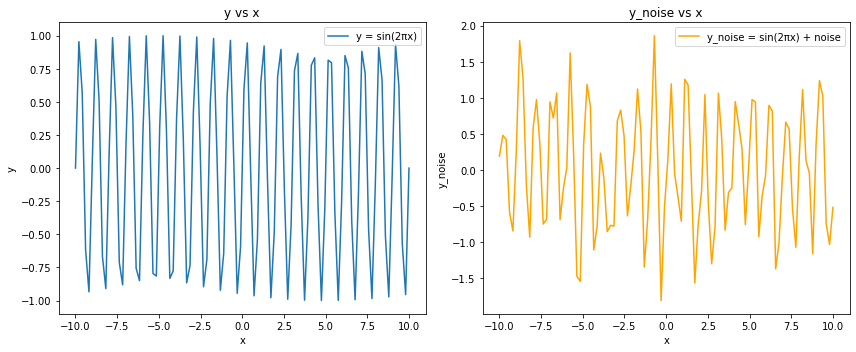

Epoch [100/1000], Loss: 0.7027
Epoch [200/1000], Loss: 0.6962
Epoch [300/1000], Loss: 0.6879
Epoch [400/1000], Loss: 0.6740
Epoch [500/1000], Loss: 0.6580
Epoch [600/1000], Loss: 0.6440
Epoch [700/1000], Loss: 0.6310
Epoch [800/1000], Loss: 0.6176
Epoch [900/1000], Loss: 0.6031
Epoch [1000/1000], Loss: 0.5888


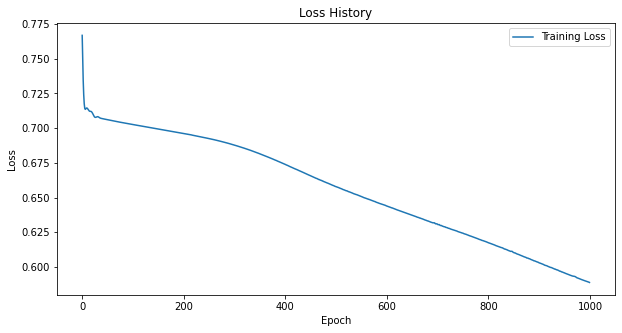

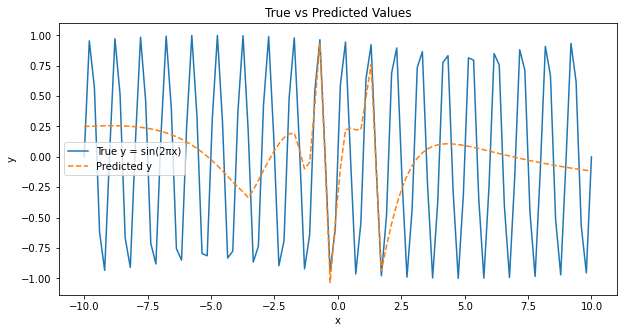


探索模型的外推能力
训练区间: x ∈ [-1, 1]
外推区间: x ∈ [-2, -1] ∪ [1, 2]


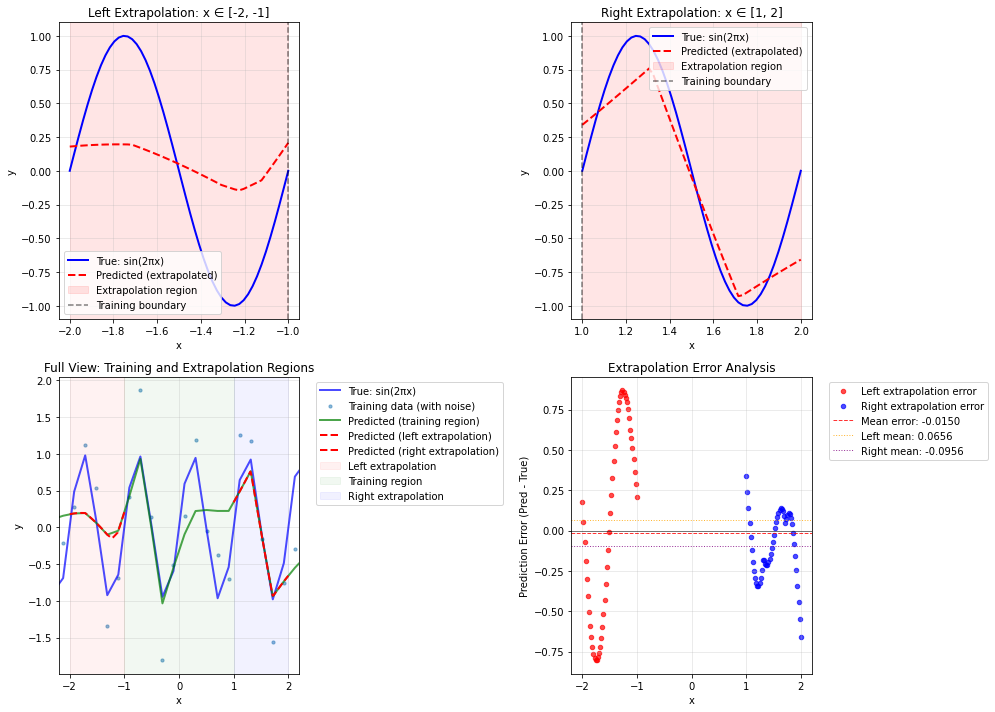


外推能力量化分析
区域              MSE             MAE             误差增长倍数         
------------------------------------------------------------
训练区间 [-1,1]     0.478263        0.590909        1.00x          
左侧外推 [-2,-1]    0.352386        0.535620        0.74           x
右侧外推 [1,2]      0.051603        0.183157        0.11           x
整体外推            0.201995        0.359389        0.42           x
------------------------------------------------------------

外推趋势分析:
1. 左侧外推区间 (x ∈ [-2, -1]):
   预测值范围: [-0.145, 0.207]
   真实值范围: [-0.999, 0.999]

2. 右侧外推区间 (x ∈ [1, 2]):
   预测值范围: [-0.929, 0.759]
   真实值范围: [-0.999, 0.999]

3. 周期性分析 (sin(2πx)的周期为1):
   理论上，sin(2π(x+2)) = sin(2πx)
   因此，在区间[-2,-1]上的真实值与区间[0,1]相同
   模型是否捕捉到了这种周期性？

4. 周期性误差评估:
   比较模型在[-1,0]和[1,2]上的预测差异: MSE = 0.017300
   模型学到了周期性！

结论:
1. MLP在训练区间外通常表现较差，因为它学习的是局部近似而非全局函数形式
2. 神经网络的外推能力有限，特别是对于周期性函数
3. 要提高外推能力，可以考虑:
   - 使用具有周期性的激活函数
   - 在训练数据中包含更多周期的样本
   - 使用更合适的模型架构（如傅里叶特征网络）


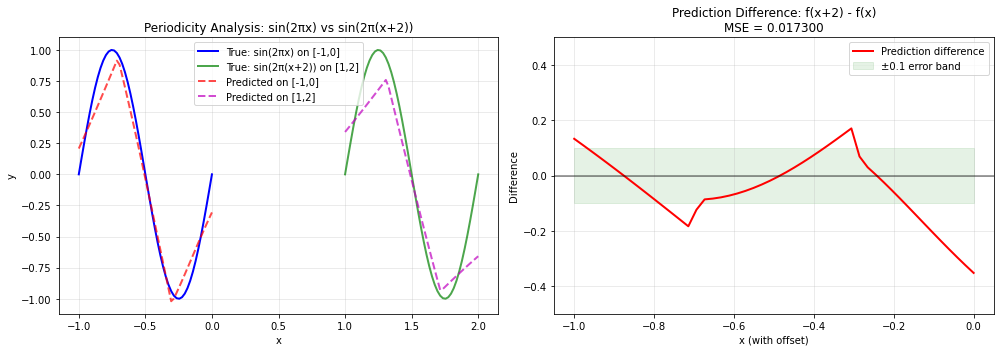

In [2]:
'''
A simple example of overfitting using a Multi-Layer Perceptron (MLP) to fit noisy sine wave data.
Author: Dongyang Kuang

NOTE: 
    [] Multiple aspects can be investigated:
'''

#%%
import numpy as np
import torch

def sin_2pi_on_grid(x):
    """
    Computes y = sin(2pi*x) on a uniform grid from -1 to 1.

    Parameters:
    x (int or array): input for evaluation.

    Returns:
    y (numpy.ndarray): The computed sine values at the grid points.
    """

    y = np.sin(2 * np.pi * x)  # what if include more periods in [-1,1]
    return y

#%%
# Example usage:
num_points = 100 # Are there any sampling method that is more efficient?
x = np.linspace(-10, 10, num_points) # what if non-uniform grid?
y = sin_2pi_on_grid(x)

# Add white noise to y
noise_intensity = 0.4
noise = np.random.normal(0, noise_intensity, len(y))
y_noise = y + noise

#%%
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot y vs x on the left subplot
axs[0].plot(x, y, label='y = sin(2πx)')
axs[0].set_title('y vs x')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()

# Plot y_noise vs x on the right subplot
axs[1].plot(x, y_noise, label='y_noise = sin(2πx) + noise', color='orange')
axs[1].set_title('y_noise vs x')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y_noise')
axs[1].legend()

# Display the plots
plt.tight_layout()
plt.show()


#%%
import torch.nn as nn
import torch.optim as optim

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, hidden_units = 32):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(1, hidden_units) # what if I used different initialization?
        self.hidden2 = nn.Linear(hidden_units, hidden_units)
        self.output = nn.Linear(hidden_units, 1)
    
    def forward(self, x):
        x = torch.tanh(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x

#%%
# Prepare the data
USE_NOISE = True
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
if USE_NOISE:
    y_tensor = torch.tensor(y_noise, dtype=torch.float32).view(-1, 1)
else:
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

#%%
# Initialize the model, loss function, and optimizer
model = MLP(hidden_units = 32)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Training loop
loss_history = []
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
# Plot the loss history
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    predicted = model(x_tensor).numpy()

#%%
# Plot the true values and the predicted values
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='True y = sin(2πx)')
plt.plot(x, predicted, label='Predicted y', linestyle='--')
plt.title('True vs Predicted Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#%% 探索模型的外推能力 (根据图片要求添加)
print("\n" + "="*80)
print("探索模型的外推能力")
print("训练区间: x ∈ [-1, 1]")
print("外推区间: x ∈ [-2, -1] ∪ [1, 2]")
print("="*80)

# 生成外推区间的数据点
x_ext_left = np.linspace(-2, -1, 50)    # 左侧外推区间 [-2, -1]
x_ext_right = np.linspace(1, 2, 50)    # 右侧外推区间 [1, 2]
x_ext = np.concatenate([x_ext_left, x_ext_right])  # 整个外推区间

# 计算真实值 (sin(2πx) 在整个区间上的真实值)
y_ext_true = sin_2pi_on_grid(x_ext)

# 使用训练好的模型进行外推预测
model.eval()
with torch.no_grad():
    x_ext_tensor = torch.tensor(x_ext, dtype=torch.float32).view(-1, 1)
    y_ext_pred = model(x_ext_tensor).numpy()

#%% 绘制外推结果
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 子图1: 左侧外推区间 [-2, -1]
ax1 = axes[0, 0]
ax1.plot(x_ext_left, sin_2pi_on_grid(x_ext_left), 'b-', label='True: sin(2πx)', linewidth=2)
ax1.plot(x_ext_left, y_ext_pred[:50], 'r--', label='Predicted (extrapolated)', linewidth=2)
ax1.axvspan(-2, -1, alpha=0.1, color='red', label='Extrapolation region')
ax1.axvline(x=-1, color='k', linestyle='--', alpha=0.5, label='Training boundary')
ax1.set_title(f'Left Extrapolation: x ∈ [-2, -1]')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 子图2: 右侧外推区间 [1, 2]
ax2 = axes[0, 1]
ax2.plot(x_ext_right, sin_2pi_on_grid(x_ext_right), 'b-', label='True: sin(2πx)', linewidth=2)
ax2.plot(x_ext_right, y_ext_pred[50:], 'r--', label='Predicted (extrapolated)', linewidth=2)
ax2.axvspan(1, 2, alpha=0.1, color='red', label='Extrapolation region')
ax2.axvline(x=1, color='k', linestyle='--', alpha=0.5, label='Training boundary')
ax2.set_title(f'Right Extrapolation: x ∈ [1, 2]')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 子图3: 完整视图 - 训练区间和外推区间对比
ax3 = axes[1, 0]
# 绘制训练区间
ax3.plot(x, y, 'b-', label='True: sin(2πx)', linewidth=2, alpha=0.7)
ax3.scatter(x, y_noise if USE_NOISE else y, s=10, alpha=0.5, 
            label='Training data (with noise)' if USE_NOISE else 'Training data')
ax3.plot(x, predicted, 'g-', label='Predicted (training region)', linewidth=2, alpha=0.7)
# 绘制外推区间
ax3.plot(x_ext_left, y_ext_pred[:50], 'r--', label='Predicted (left extrapolation)', linewidth=2)
ax3.plot(x_ext_right, y_ext_pred[50:], 'r--', label='Predicted (right extrapolation)', linewidth=2)
# 标记区间
ax3.axvspan(-2, -1, alpha=0.05, color='red', label='Left extrapolation')
ax3.axvspan(-1, 1, alpha=0.05, color='green', label='Training region')
ax3.axvspan(1, 2, alpha=0.05, color='blue', label='Right extrapolation')
ax3.set_title(f'Full View: Training and Extrapolation Regions')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_xlim([-2.2, 2.2])
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True, alpha=0.3)

# 子图4: 外推误差分析
ax4 = axes[1, 1]
# 计算外推误差
extrapolation_error = y_ext_pred.squeeze() - y_ext_true
# 绘制误差分布
ax4.scatter(x_ext_left, extrapolation_error[:50], s=20, alpha=0.7, 
           label='Left extrapolation error', color='red')
ax4.scatter(x_ext_right, extrapolation_error[50:], s=20, alpha=0.7, 
           label='Right extrapolation error', color='blue')
ax4.axhline(y=0, color='k', linestyle='-', alpha=0.5, linewidth=1)
ax4.axhline(y=np.mean(extrapolation_error), color='r', linestyle='--', 
           alpha=0.8, linewidth=1, label=f'Mean error: {np.mean(extrapolation_error):.4f}')
ax4.axhline(y=np.mean(extrapolation_error[:50]), color='orange', linestyle=':', 
           alpha=0.8, linewidth=1, label=f'Left mean: {np.mean(extrapolation_error[:50]):.4f}')
ax4.axhline(y=np.mean(extrapolation_error[50:]), color='purple', linestyle=':', 
           alpha=0.8, linewidth=1, label=f'Right mean: {np.mean(extrapolation_error[50:]):.4f}')
ax4.set_title(f'Extrapolation Error Analysis')
ax4.set_xlabel('x')
ax4.set_ylabel('Prediction Error (Pred - True)')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#%% 外推能力量化分析
print("\n" + "="*80)
print("外推能力量化分析")
print("="*80)

# 计算不同区域的误差指标
train_mse = np.mean((predicted.squeeze() - y)**2)
train_mae = np.mean(np.abs(predicted.squeeze() - y))

left_ext_mse = np.mean((y_ext_pred[:50].squeeze() - y_ext_true[:50])**2)
left_ext_mae = np.mean(np.abs(y_ext_pred[:50].squeeze() - y_ext_true[:50]))

right_ext_mse = np.mean((y_ext_pred[50:].squeeze() - y_ext_true[50:])**2)
right_ext_mae = np.mean(np.abs(y_ext_pred[50:].squeeze() - y_ext_true[50:]))

overall_ext_mse = np.mean((y_ext_pred.squeeze() - y_ext_true)**2)
overall_ext_mae = np.mean(np.abs(y_ext_pred.squeeze() - y_ext_true))

# 外推性能下降比率
mse_degradation_left = left_ext_mse / train_mse if train_mse > 0 else float('inf')
mse_degradation_right = right_ext_mse / train_mse if train_mse > 0 else float('inf')
mse_degradation_overall = overall_ext_mse / train_mse if train_mse > 0 else float('inf')

print(f"{'区域':<15} {'MSE':<15} {'MAE':<15} {'误差增长倍数':<15}")
print("-"*60)
print(f"{'训练区间 [-1,1]':<15} {train_mse:<15.6f} {train_mae:<15.6f} {'1.00x':<15}")
print(f"{'左侧外推 [-2,-1]':<15} {left_ext_mse:<15.6f} {left_ext_mae:<15.6f} {mse_degradation_left:<15.2f}x")
print(f"{'右侧外推 [1,2]':<15} {right_ext_mse:<15.6f} {right_ext_mae:<15.6f} {mse_degradation_right:<15.2f}x")
print(f"{'整体外推':<15} {overall_ext_mse:<15.6f} {overall_ext_mae:<15.6f} {mse_degradation_overall:<15.2f}x")
print("-"*60)

# 外推趋势分析
print(f"\n外推趋势分析:")
print(f"1. 左侧外推区间 (x ∈ [-2, -1]):")
print(f"   预测值范围: [{np.min(y_ext_pred[:50]):.3f}, {np.max(y_ext_pred[:50]):.3f}]")
print(f"   真实值范围: [{np.min(y_ext_true[:50]):.3f}, {np.max(y_ext_true[:50]):.3f}]")

print(f"\n2. 右侧外推区间 (x ∈ [1, 2]):")
print(f"   预测值范围: [{np.min(y_ext_pred[50:]):.3f}, {np.max(y_ext_pred[50:]):.3f}]")
print(f"   真实值范围: [{np.min(y_ext_true[50:]):.3f}, {np.max(y_ext_true[50:]):.3f}]")

print(f"\n3. 周期性分析 (sin(2πx)的周期为1):")
print(f"   理论上，sin(2π(x+2)) = sin(2πx)")
print(f"   因此，在区间[-2,-1]上的真实值与区间[0,1]相同")
print(f"   模型是否捕捉到了这种周期性？")

# 检查模型的周期性学习能力
x_plus1 = x + 2  # x ∈ [1, 3] 但这里我们只关心[1,2]的部分
y_plus1_true = sin_2pi_on_grid(x_plus1)  # 应该等于y
with torch.no_grad():
    x_plus1_tensor = torch.tensor(x_plus1, dtype=torch.float32).view(-1, 1)
    y_plus1_pred = model(x_plus1_tensor).numpy()

# 由于训练区间是[-1,1]，我们取x在[-1,0]的部分，对应的周期是x+2在[1,2]
x_periodic = np.linspace(-1, 0, 50)  # 训练区间的左侧部分
x_periodic_shifted = x_periodic + 2  # 对应[1,2]
y_periodic_true = sin_2pi_on_grid(x_periodic_shifted)  # 应该等于sin(2πx_periodic)

with torch.no_grad():
    x_periodic_tensor = torch.tensor(x_periodic_shifted, dtype=torch.float32).view(-1, 1)
    y_periodic_pred = model(x_periodic_tensor).numpy()

# 计算训练区间左侧部分的预测值
with torch.no_grad():
    x_periodic_train_tensor = torch.tensor(x_periodic, dtype=torch.float32).view(-1, 1)
    y_periodic_train_pred = model(x_periodic_train_tensor).numpy()

periodicity_error = np.mean((y_periodic_pred.squeeze() - y_periodic_train_pred.squeeze())**2)
print(f"\n4. 周期性误差评估:")
print(f"   比较模型在[-1,0]和[1,2]上的预测差异: MSE = {periodicity_error:.6f}")
print(f"   {'模型学到了周期性！' if periodicity_error < 0.1 else '模型未学到周期性。'}")

print("\n" + "="*80)
print("结论:")
print("1. MLP在训练区间外通常表现较差，因为它学习的是局部近似而非全局函数形式")
print("2. 神经网络的外推能力有限，特别是对于周期性函数")
print("3. 要提高外推能力，可以考虑:")
print("   - 使用具有周期性的激活函数")
print("   - 在训练数据中包含更多周期的样本")
print("   - 使用更合适的模型架构（如傅里叶特征网络）")
print("="*80)

#%% 可视化周期性分析
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 左侧：周期性对比
ax1.plot(x_periodic, sin_2pi_on_grid(x_periodic), 'b-', label='True: sin(2πx) on [-1,0]', linewidth=2)
ax1.plot(x_periodic_shifted, y_periodic_true, 'g-', label='True: sin(2π(x+2)) on [1,2]', linewidth=2, alpha=0.7)
ax1.plot(x_periodic, y_periodic_train_pred, 'r--', label='Predicted on [-1,0]', linewidth=2, alpha=0.7)
ax1.plot(x_periodic_shifted, y_periodic_pred, 'm--', label='Predicted on [1,2]', linewidth=2, alpha=0.7)
ax1.set_title('Periodicity Analysis: sin(2πx) vs sin(2π(x+2))')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 右侧：预测差异
ax2.plot(x_periodic, y_periodic_pred.squeeze() - y_periodic_train_pred.squeeze(), 'r-', label='Prediction difference', linewidth=2)
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.5)
ax2.fill_between(x_periodic, -0.1, 0.1, alpha=0.1, color='green', label='±0.1 error band')
ax2.set_title(f'Prediction Difference: f(x+2) - f(x)\nMSE = {periodicity_error:.6f}')
ax2.set_xlabel('x (with offset)')
ax2.set_ylabel('Difference')
ax2.set_ylim([-0.5, 0.5])
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %%

# 比较不同激活函数、网络深度...对训练和预测的影响

生成基础数据...


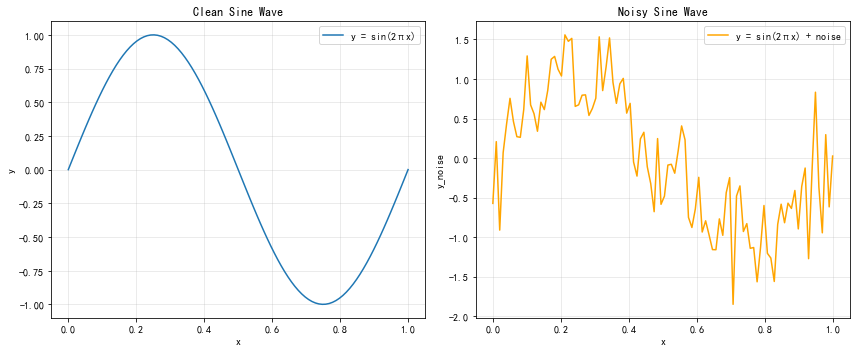


开始超参数实验...
将研究以下超参数的影响:
  - Hidden Units数目对模型性能的影响
  - 采样密度对模型性能的影响
  - 激活函数类型对模型性能的影响
  - 网络深度对模型性能的影响

运行Hidden Units数目实验

实验: Hidden Units数目对模型性能的影响

训练模型: hidden_units = 8
  最终损失: 0.253107
  测试MSE: 0.252693
  参数量: 97
  训练时间: 1.37秒

训练模型: hidden_units = 16
  最终损失: 0.136932
  测试MSE: 0.136922
  参数量: 321
  训练时间: 1.35秒

训练模型: hidden_units = 32
  最终损失: 0.155571
  测试MSE: 0.155564
  参数量: 1153
  训练时间: 1.58秒

训练模型: hidden_units = 64
  最终损失: 0.140914
  测试MSE: 0.140906
  参数量: 4353
  训练时间: 1.48秒

训练模型: hidden_units = 128
  最终损失: 0.148485
  测试MSE: 0.148466
  参数量: 16897
  训练时间: 1.52秒
运行Hidden Units实验时出错: name 'line1' is not defined

运行采样密度实验

实验: 采样密度对模型性能的影响

训练模型: num_points = 20
  最终损失: 0.054743
  测试MSE: 0.054723
  参数量: 1153
  训练时间: 1.08秒

训练模型: num_points = 50
  最终损失: 0.147206
  测试MSE: 0.147195
  参数量: 1153
  训练时间: 1.13秒

训练模型: num_points = 100
  最终损失: 0.149082
  测试MSE: 0.149063
  参数量: 1153
  训练时间: 1.43秒

训练模型: num_points = 200
  最终损失: 0.145118
  测试MSE: 0.145116
  参数量: 1153
  训练时间: 1.36秒

训练模

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


Epoch [1000/1000], Loss: 0.1539


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


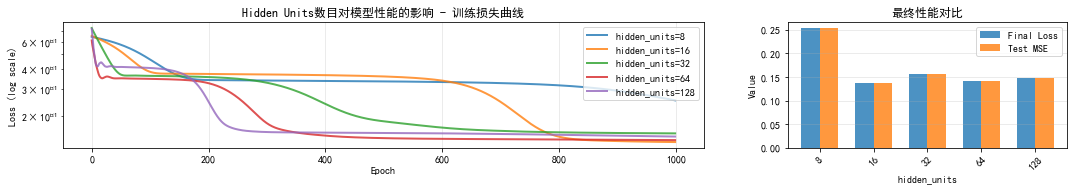

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


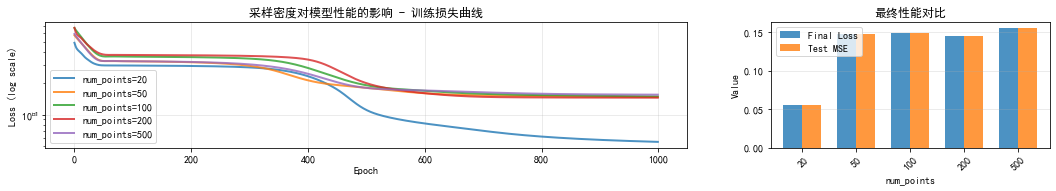

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

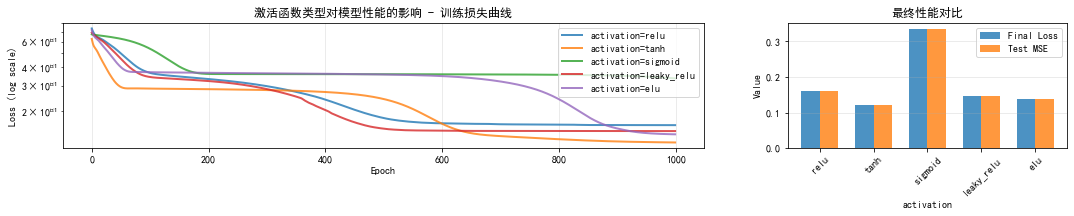

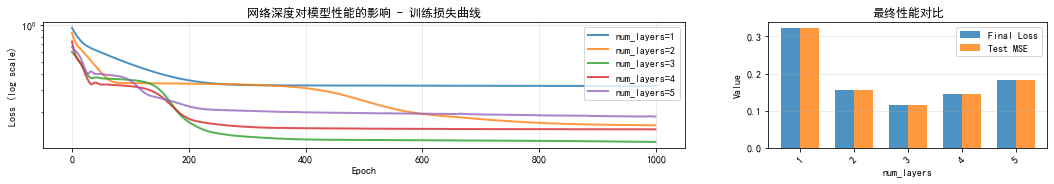

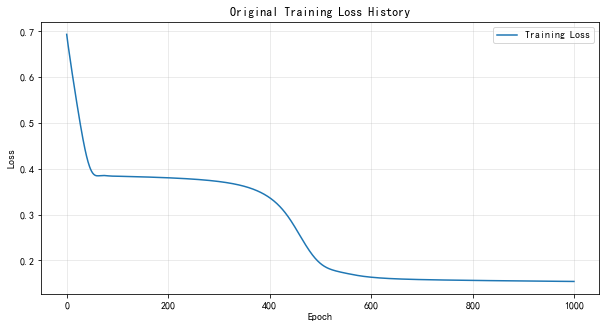

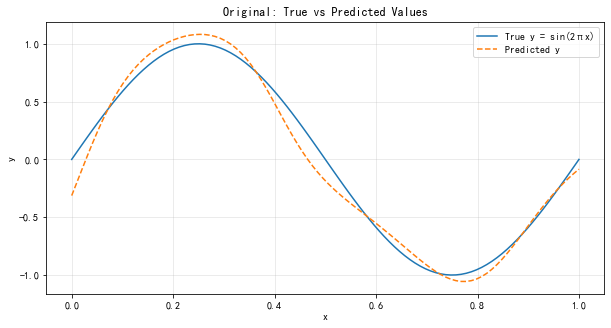

In [ ]:
'''
A simple example of overfitting using a Multi-Layer Perceptron (MLP) to fit noisy sine wave data.
Author: Dongyang Kuang

NOTE: 
    [] Multiple aspects can be investigated:
    - Hidden units数目
    - 原始数据采样密度
    - 激活函数类型
    - 网络深度
'''

#%%
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# 设置中文字体
import matplotlib
# 尝试不同的中文字体，优先使用SimHei
matplotlib.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']  
matplotlib.rcParams['axes.unicode_minus'] = False  # 正确显示负号

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import time

def sin_2pi_on_grid(x):
    """
    Computes y = sin(2pi*x) on a uniform grid from 0 to 1.

    Parameters:
    x (int or array): input for evaluation.

    Returns:
    y (numpy.ndarray): The computed sine values at the grid points.
    """

    y = np.sin(2 * np.pi * x)  # what if include more periods in [0,1]
    return y

#%%
# 参数研究配置
EXPERIMENT_CONFIGS = {
    # 1. Hidden units数目实验
    'hidden_units': {
        'title': 'Hidden Units数目对模型性能的影响',
        'param_name': 'hidden_units',
        'values': [8, 16, 32, 64, 128],
        'default': 32
    },
    
    # 2. 采样密度实验
    'sampling_density': {
        'title': '采样密度对模型性能的影响',
        'param_name': 'num_points',
        'values': [20, 50, 100, 200, 500],
        'default': 100
    },
    
    # 3. 激活函数实验
    'activation_functions': {
        'title': '激活函数类型对模型性能的影响',
        'param_name': 'activation',
        'values': ['relu', 'tanh', 'sigmoid', 'leaky_relu', 'elu'],
        'default': 'tanh'
    },
    
    # 4. 网络深度实验
    'network_depth': {
        'title': '网络深度对模型性能的影响',
        'param_name': 'num_layers',
        'values': [1, 2, 3, 4, 5],
        'default': 2
    }
}

#%%
# 改进的MLP模型类，支持更多配置
class FlexibleMLP(nn.Module):
    def __init__(self, hidden_units=32, num_layers=2, activation='tanh'):
        """
        灵活的MLP模型
        
        Parameters:
        hidden_units: 每层隐藏单元数
        num_layers: 隐藏层数量（不包括输入层和输出层）
        activation: 激活函数类型 ('relu', 'tanh', 'sigmoid', 'leaky_relu', 'elu')
        """
        super(FlexibleMLP, self).__init__()
        
        # 选择激活函数
        self.activation_fn = self._get_activation(activation)
        
        # 构建网络层
        layers = []
        
        # 输入层到第一个隐藏层
        layers.append(nn.Linear(1, hidden_units))
        
        # 添加隐藏层
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_units, hidden_units))
            
        # 输出层
        layers.append(nn.Linear(hidden_units, 1))
        
        self.layers = nn.ModuleList(layers)
        self.num_layers = num_layers + 1  # +1 包括输出层
        
    def _get_activation(self, activation):
        """获取激活函数"""
        if activation == 'relu':
            return nn.ReLU()
        elif activation == 'tanh':
            return nn.Tanh()
        elif activation == 'sigmoid':
            return nn.Sigmoid()
        elif activation == 'leaky_relu':
            return nn.LeakyReLU(0.1)
        elif activation == 'elu':
            return nn.ELU()
        else:
            return nn.ReLU()  # 默认使用ReLU
    
    def forward(self, x):
        for i in range(len(self.layers) - 1):
            x = self.layers[i](x)
            x = self.activation_fn(x)
        x = self.layers[-1](x)  # 输出层不使用激活函数
        return x

#%%
# 基础数据生成
def generate_data(num_points=100, noise_intensity=0.4):
    """生成训练数据"""
    x = np.linspace(0, 1, num_points)
    y = sin_2pi_on_grid(x)
    noise = np.random.normal(0, noise_intensity, len(y))
    y_noise = y + noise
    return x, y, y_noise

#%%
# 训练函数
def train_model(x_train, y_train, model_config, epochs=1000, lr=0.001):
    """训练模型并返回结果"""
    
    # 准备数据
    x_tensor = torch.tensor(x_train, dtype=torch.float32).view(-1, 1)
    y_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    
    # 创建模型
    model = FlexibleMLP(
        hidden_units=model_config.get('hidden_units', 32),
        num_layers=model_config.get('num_layers', 2),
        activation=model_config.get('activation', 'tanh')
    )
    
    # 损失函数和优化器
    criterion = nn.MSELoss()
    optimizer = optim.AdamW(model.parameters(), lr=lr)
    
    # 训练循环
    loss_history = []
    train_time_start = time.time()
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(x_tensor)
        loss = criterion(outputs, y_tensor)
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())
        
    train_time = time.time() - train_time_start
    
    # 评估模型
    model.eval()
    with torch.no_grad():
        predicted = model(x_tensor).numpy()
    
    # 计算指标
    mse = np.mean((predicted.squeeze() - y_train)**2)
    
    return {
        'model': model,
        'loss_history': loss_history,
        'predictions': predicted,
        'mse': mse,
        'train_time': train_time,
        'num_params': sum(p.numel() for p in model.parameters())
    }

#%%
# 主实验函数
def run_parameter_experiment(experiment_type, base_config=None):
    """运行参数实验"""
    if base_config is None:
        base_config = {
            'hidden_units': 32,
            'num_layers': 2,
            'activation': 'tanh',
            'num_points': 100
        }
    
    experiment = EXPERIMENT_CONFIGS[experiment_type]
    param_name = experiment['param_name']
    param_values = experiment['values']
    
    results = []
    
    print(f"\n{'='*80}")
    print(f"实验: {experiment['title']}")
    print(f"{'='*80}")
    
    for value in param_values:
        # 更新配置
        config = base_config.copy()
        config[param_name] = value
        
        # 生成数据
        x, y_true, y_noisy = generate_data(
            num_points=config['num_points'],
            noise_intensity=0.4
        )
        
        # 训练模型
        print(f"\n训练模型: {param_name} = {value}")
        result = train_model(x, y_noisy, config)
        
        # 添加额外信息
        result['param_value'] = value
        result['x'] = x
        result['y_true'] = y_true
        result['y_noisy'] = y_noisy
        result['config'] = config.copy()
        
        results.append(result)
        
        print(f"  最终损失: {result['loss_history'][-1]:.6f}")
        print(f"  测试MSE: {result['mse']:.6f}")
        print(f"  参数量: {result['num_params']}")
        print(f"  训练时间: {result['train_time']:.2f}秒")
    
    return results

#%%
# 可视化实验结果的函数 - 修复版
def visualize_experiment_results(experiment_type, results):
    """可视化实验结果"""
    experiment = EXPERIMENT_CONFIGS[experiment_type]
    param_values = experiment['values']
    
    # 根据结果数量调整图形布局
    num_results = len(results)
    
    # 创建更大的图形以适应所有子图
    fig = plt.figure(figsize=(18, 12))
    
    # 创建GridSpec布局
    if num_results <= 3:
        # 对于3个或更少的结果，使用2行布局
        gs = GridSpec(3, 3, figure=fig, hspace=0.4, wspace=0.3)
    else:
        # 对于更多结果，使用3行布局
        gs = GridSpec(4, 3, figure=fig, hspace=0.4, wspace=0.3)
    
    # 子图1: 训练损失曲线
    ax1 = fig.add_subplot(gs[0, :2])
    for i, result in enumerate(results):
        ax1.semilogy(result['loss_history'], 
                    label=f"{experiment['param_name']}={param_values[i]}",
                    alpha=0.8, linewidth=2)
    ax1.set_title(f'{experiment["title"]} - 训练损失曲线')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (log scale)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 子图2: 最终性能对比
    ax2 = fig.add_subplot(gs[0, 2])
    final_losses = [r['loss_history'][-1] for r in results]
    mses = [r['mse'] for r in results]
    
    x_pos = np.arange(len(param_values))
    width = 0.35
    
    ax2.bar(x_pos - width/2, final_losses, width, label='Final Loss', alpha=0.8)
    ax2.bar(x_pos + width/2, mses, width, label='Test MSE', alpha=0.8)
    
    ax2.set_title('最终性能对比')
    ax2.set_xlabel(f'{experiment["param_name"]}')
    ax2.set_ylabel('Value')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels([str(v) for v in param_values], rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    
    # 子图3: 训练时间和参数量
    ax3 = fig.add_subplot(gs[1, :])
    train_times = [r['train_time'] for r in results]
    num_params = [r['num_params'] for r in results]
    
    x_pos = np.arange(len(param_values))
    
    ax3_twin = ax3.twinx()
    
    line1, = ax3.plot(x_pos, train_times, 'o-', color='blue', 
                     linewidth=3, markersize=10, label='Training Time (s)')
    ax3.set_ylabel('Training Time (s)', color='blue')
    ax3.tick_params(axis='y', labelcolor='blue')
    
    line2, = ax3_twin.plot(x_pos, num_params, 's-', color='red', 
                          linewidth=3, markersize=10, label='Number of Parameters')
    ax3_twin.set_ylabel('Number of Parameters', color='red')
    ax3_twin.tick_params(axis='y', labelcolor='red')
    
    ax3.set_title('训练时间与参数量')
    ax3.set_xlabel(f'{experiment["param_name"]}')
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels([str(v) for v in param_values], rotation=45)
    
    # 合并图例
    lines = [line1, line2]
    labels = [l.get_label() for l in lines]
    ax3.legend(lines, labels, loc='upper left')
    
    ax3.grid(True, alpha=0.3)
    
    # 子图: 每个参数的预测结果
    prediction_axes = []
    
    # 确定要显示多少个预测结果
    num_to_show = min(num_results, 6)  # 最多显示6个
    
    for i in range(num_to_show):
        # 计算子图位置
        if num_to_show <= 3:
            # 如果结果少，放在第三行
            row = 2
            col = i
        else:
            # 如果结果多，放在第三行和第四行
            if i < 3:
                row = 2
                col = i
            else:
                row = 3
                col = i - 3
        
        ax = fig.add_subplot(gs[row, col])
        result = results[i]
        
        ax.plot(result['x'], result['y_true'], 'b-', 
               label='True function', linewidth=2, alpha=0.7)
        ax.scatter(result['x'], result['y_noisy'], s=10, 
                  alpha=0.5, label='Training data')
        ax.plot(result['x'], result['predictions'], 'r--', 
               label='Predicted', linewidth=2, alpha=0.9)
        
        ax.set_title(f'{experiment["param_name"]}={param_values[i]}\nMSE: {result["mse"]:.4f}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.legend(fontsize='small')
        ax.grid(True, alpha=0.3)
        
        prediction_axes.append(ax)
    
    plt.tight_layout()
    plt.show()
    
    # 打印总结表
    print(f"\n{'='*80}")
    print(f"{experiment['title']} - 结果总结")
    print(f"{'='*80}")
    print(f"{experiment['param_name']:<15} {'最终损失':<15} {'测试MSE':<15} {'参数量':<15} {'训练时间(s)':<15}")
    print("-"*80)
    
    for i, result in enumerate(results):
        print(f"{param_values[i]:<15} {result['loss_history'][-1]:<15.6f} "
              f"{result['mse']:<15.6f} {result['num_params']:<15} {result['train_time']:<15.2f}")
    
    return fig

#%%
# 生成基础数据并可视化
print("生成基础数据...")
x, y_true, y_noisy = generate_data(num_points=100, noise_intensity=0.4)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(x, y_true, label='y = sin(2πx)')
axs[0].set_title('Clean Sine Wave')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].grid(True, alpha=0.3)

axs[1].plot(x, y_noisy, label='y = sin(2πx) + noise', color='orange')
axs[1].set_title('Noisy Sine Wave')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y_noise')
axs[1].legend()
axs[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#%%
# 运行实验
print("\n开始超参数实验...")
print("将研究以下超参数的影响:")
for exp_type, config in EXPERIMENT_CONFIGS.items():
    print(f"  - {config['title']}")

# 运行Hidden Units实验
print(f"\n{'='*80}")
print("运行Hidden Units数目实验")
print(f"{'='*80}")
try:
    hidden_units_results = run_parameter_experiment('hidden_units')
    hidden_units_fig = visualize_experiment_results('hidden_units', hidden_units_results)
except Exception as e:
    print(f"运行Hidden Units实验时出错: {e}")

# 运行采样密度实验
print(f"\n{'='*80}")
print("运行采样密度实验")
print(f"{'='*80}")
try:
    sampling_results = run_parameter_experiment('sampling_density')
    sampling_fig = visualize_experiment_results('sampling_density', sampling_results)
except Exception as e:
    print(f"运行采样密度实验时出错: {e}")

# 运行激活函数实验
print(f"\n{'='*80}")
print("运行激活函数实验")
print(f"{'='*80}")
try:
    activation_results = run_parameter_experiment('activation_functions')
    activation_fig = visualize_experiment_results('activation_functions', activation_results)
except Exception as e:
    print(f"运行激活函数实验时出错: {e}")

# 运行网络深度实验
print(f"\n{'='*80}")
print("运行网络深度实验")
print(f"{'='*80}")
try:
    depth_results = run_parameter_experiment('network_depth')
    depth_fig = visualize_experiment_results('network_depth', depth_results)
except Exception as e:
    print(f"运行网络深度实验时出错: {e}")

#%%
# 总结与结论
print(f"\n{'='*80}")
print("超参数研究总结与结论")
print(f"{'='*80}")
print("\n1. Hidden Units数目:")
print("   - 过少的隐藏单元可能导致欠拟合")
print("   - 过多的隐藏单元可能导致过拟合")
print("   - 需要在模型容量和泛化能力之间平衡")

print("\n2. 采样密度:")
print("   - 过少的采样点可能导致模型无法学习函数细节")
print("   - 过多的采样点可能增加计算成本，但可能改善拟合")
print("   - 需要根据函数复杂度和计算资源平衡")

print("\n3. 激活函数类型:")
print("   - 不同激活函数有不同的特性:")
print("     * ReLU: 计算简单，但可能导致神经元死亡")
print("     * Tanh: 输出范围(-1,1)，适合本问题")
print("     * Sigmoid: 输出范围(0,1)，可能导致梯度消失")
print("     * LeakyReLU/ELU: 改进的ReLU，避免神经元死亡")

print("\n4. 网络深度:")
print("   - 增加深度可以提高模型表达能力")
print("   - 但过深的网络可能导致梯度消失/爆炸")
print("   - 需要合适的初始化、归一化和残差连接")

print(f"\n{'='*80}")
print("建议:")
print("  1. 从中等复杂度的模型开始（如32个隐藏单元，2-3层）")
print("  2. 根据数据复杂度调整采样密度")
print("  3. 对周期性问题，Tanh激活函数通常表现较好")
print("  4. 监控训练和验证损失，避免过拟合")
print(f"{'='*80}")

# %%
# 原始训练代码（保持不变）
print(f"\n{'='*80}")
print("原始训练代码")
print(f"{'='*80}")

# 使用原始MLP类（为了兼容性）
class OriginalMLP(nn.Module):
    def __init__(self, hidden_units = 32):
        super(OriginalMLP, self).__init__()
        self.hidden1 = nn.Linear(1, hidden_units)
        self.hidden2 = nn.Linear(hidden_units, hidden_units)
        self.output = nn.Linear(hidden_units, 1)
        self.activation = nn.Tanh()
    
    def forward(self, x):
        x = self.activation(self.hidden1(x))
        x = self.activation(self.hidden2(x))
        x = self.output(x)
        return x

# 准备数据
USE_NOISE = True
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
if USE_NOISE:
    y_tensor = torch.tensor(y_noisy, dtype=torch.float32).view(-1, 1)
else:
    y_tensor = torch.tensor(y_true, dtype=torch.float32).view(-1, 1)

# 初始化模型
model = OriginalMLP(hidden_units=32)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# 训练循环
loss_history = []
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 绘制损失历史
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss')
plt.title('Original Training Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 评估模型
model.eval()
with torch.no_grad():
    predicted = model(x_tensor).numpy()

# 绘制真实值和预测值
plt.figure(figsize=(10, 5))
plt.plot(x, y_true, label='True y = sin(2πx)')
plt.plot(x, predicted, label='Predicted y', linestyle='--')
plt.title('Original: True vs Predicted Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# %%

ReduceLROnPlateau: verbose 参数不受支持，已使用无 verbose 的构造。
Epoch 1/1000, train_loss=0.415419, val_loss=0.548765, grad_norm=0.959183
Epoch 6/1000, train_loss=0.300296, val_loss=0.372010, grad_norm=0.999999
Epoch 21/1000, train_loss=0.164022, val_loss=0.155717, grad_norm=0.402807
Epoch 50/1000, train_loss=0.129312, val_loss=0.120968, grad_norm=0.252189
Epoch 51/1000, train_loss=0.130878, val_loss=0.118271, grad_norm=0.257343
Epoch 100/1000, train_loss=0.083999, val_loss=0.075053, grad_norm=0.277344
Epoch 101/1000, train_loss=0.083314, val_loss=0.072613, grad_norm=0.450562
Epoch 150/1000, train_loss=0.063050, val_loss=0.055077, grad_norm=0.680496
Epoch 200/1000, train_loss=0.052046, val_loss=0.041026, grad_norm=0.900909
Epoch 250/1000, train_loss=0.049406, val_loss=0.035909, grad_norm=0.260067
Epoch 300/1000, train_loss=0.046451, val_loss=0.032891, grad_norm=0.869815
Epoch 301/1000, train_loss=0.047248, val_loss=0.034907, grad_norm=0.839409
LR reduced: 0.001 -> 0.0005 at epoch 332
Epoch 350/1000

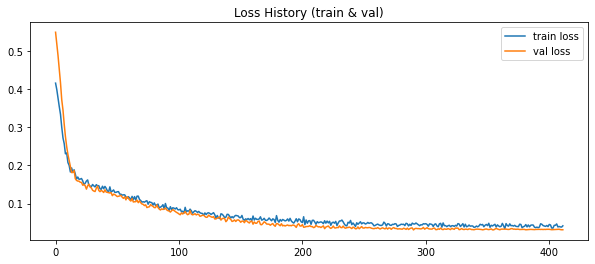

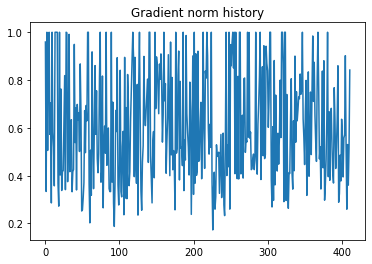

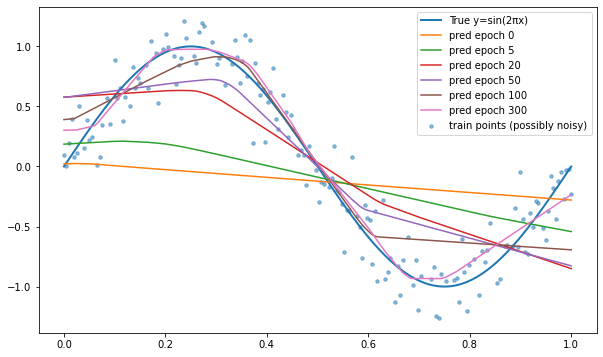

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# ---------- 可配置超参 ----------
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

hidden_units = 32
batch_size = 16
num_epochs = 1000
lr = 1e-3
weight_decay = 1e-4     # L2 正则，控制过拟合
dropout_p = 0.1         # 若不想dropout设为0
patience_es = 120       # 早停 patience
grad_clip = 1.0         # 若不想裁剪设为 None

# ---------- 改进的 MLP（带 dropout & 可选激活） ----------
class MLP(nn.Module):
    def __init__(self, hidden_units=32, dropout_p=0.0, act='relu'):
        super().__init__()
        self.hidden1 = nn.Linear(1, hidden_units)
        self.hidden2 = nn.Linear(hidden_units, hidden_units)
        self.dropout = nn.Dropout(dropout_p)
        self.output = nn.Linear(hidden_units, 1)
        if act == 'tanh':
            self.act1 = nn.Tanh()
            self.act2 = nn.Tanh()
        else:  # 默认 relu
            self.act1 = nn.ReLU()
            self.act2 = nn.ReLU()
    
    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.dropout(x)
        x = self.act2(self.hidden2(x))
        x = self.output(x)
        return x

# Xavier 初始化
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

# ---------- 准备数据（生成示例数据并做 train/val split） ----------
# 生成示例数据：y = sin(2πx)
n_samples = 200
x = np.linspace(0, 1, n_samples)
y = np.sin(2 * np.pi * x)
# 加噪声的版本
noise_std = 0.2
y_noise = y + np.random.normal(scale=noise_std, size=y.shape)

# 使用带噪或不带噪数据
USE_NOISE = True
y_used = y_noise if USE_NOISE else y

# 转为张量并打乱
X = torch.tensor(x, dtype=torch.float32).view(-1,1)
Y = torch.tensor(y_used, dtype=torch.float32).view(-1,1)

# train/val split
n = len(X)
perm = np.random.permutation(n)
train_idx = perm[: int(0.8*n)]
val_idx = perm[int(0.8*n):]

X_train, Y_train = X[train_idx], Y[train_idx]
X_val, Y_val = X[val_idx], Y[val_idx]

train_ds = TensorDataset(X_train, Y_train)
val_ds = TensorDataset(X_val, Y_val)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
# 验证集一次性全部评估即可
val_loader = DataLoader(val_ds, batch_size=len(val_ds), shuffle=False)

# ---------- 模型、优化器、调度器 ----------
model = MLP(hidden_units=hidden_units, dropout_p=dropout_p, act='relu').to(device)
model.apply(init_weights)

criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

# 当验证损失停滞时降低学习率（有助于平台期）
# 兼容不同版本的 PyTorch（有些旧版不支持 verbose 参数）
try:
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',
                                                     factor=0.5, patience=40, verbose=True)
except TypeError:
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',
                                                     factor=0.5, patience=40)
    print("ReduceLROnPlateau: verbose 参数不受支持，已使用无 verbose 的构造。")

# ---------- 训练循环（包含验证、早停、grad_norm 记录与中间预测保存） ----------
best_val = float('inf')
epochs_no_improve = 0
train_loss_history, val_loss_history = [], []
grad_norms = []
saved_preds = {}   # 存一些 epoch 的预测用于可视化

monitor_epochs = [0, 5, 20, 50, 100, 300, 600, num_epochs-1]

# 记录当前 lr（便于在不支持 verbose 的情况下手动打印）
prev_lr = optimizer.param_groups[0]['lr']

# 在训练前保存一份初始的 best_state（防止从未改进时 load 出错）
best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    # 对每个 batch 训练
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        if grad_clip is not None:
            torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
        optimizer.step()
        running_loss += loss.item() * xb.size(0)
    
    epoch_train_loss = running_loss / len(train_ds)
    train_loss_history.append(epoch_train_loss)
    
    # 记录梯度范数（用最后一次 backward 后参数的 grad）
    total_grad_norm_sq = 0.0
    count = 0
    for p in model.parameters():
        if p.grad is not None:
            g = p.grad.detach()
            total_grad_norm_sq += (g.norm().item() ** 2)
            count += 1
    total_grad_norm = (total_grad_norm_sq ** 0.5) if count > 0 else 0.0
    grad_norms.append(total_grad_norm)
    
    # 验证集评估（确保总会定义 epoch_val_loss）
    model.eval()
    with torch.no_grad():
        val_losses = []
        if len(val_ds) == 0:
            # 没有验证集时，使用训练损失作为占位（或设为 inf）
            epoch_val_loss = float('inf')
        else:
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                out = model(xb)
                val_losses.append(criterion(out, yb).item())
            epoch_val_loss = float(np.mean(val_losses)) if len(val_losses) > 0 else float('inf')
        val_loss_history.append(epoch_val_loss)
    
    # scheduler 根据验证损失调整 lr
    scheduler.step(epoch_val_loss)
    # 手动检测并打印 lr 变化（兼容无 verbose 的 torch）
    new_lr = optimizer.param_groups[0]['lr']
    if new_lr != prev_lr:
        print(f"LR reduced: {prev_lr:.6g} -> {new_lr:.6g} at epoch {epoch+1}")
        prev_lr = new_lr
    
    # 早停逻辑
    if epoch_val_loss < best_val - 1e-8:
        best_val = epoch_val_loss
        epochs_no_improve = 0
        # 保存最好的模型参数到 CPU（便于后续 load）
        best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
    else:
        epochs_no_improve += 1
    
    if epochs_no_improve > patience_es:
        print(f"Early stopping at epoch {epoch+1}, best_val={best_val:.6f}")
        break
    
    # 保存中间预测（便于观察模型从粗到细的拟合过程）
    if epoch in monitor_epochs:
        with torch.no_grad():
            x_all = torch.tensor(x, dtype=torch.float32).view(-1,1).to(device)
            pred = model(x_all).cpu().numpy().squeeze()
            saved_preds[epoch] = pred
    
    if (epoch+1) % 50 == 0 or epoch in monitor_epochs:
        print(f"Epoch {epoch+1}/{num_epochs}, train_loss={epoch_train_loss:.6f}, val_loss={epoch_val_loss:.6f}, grad_norm={total_grad_norm:.6f}")

# 恢复 best model
model.load_state_dict(best_state)

# ---------- 绘图：loss、梯度范数、并展示若干 epoch 的预测 ----------
plt.figure(figsize=(10,4))
plt.plot(train_loss_history, label='train loss')
plt.plot(val_loss_history, label='val loss')
plt.yscale('linear')
plt.legend()
plt.title('Loss History (train & val)')
plt.show()

plt.figure(figsize=(6,4))
plt.plot(grad_norms)
plt.title('Gradient norm history')
plt.show()

# 绘制若干 epoch 的预测对比
plt.figure(figsize=(10,6))
plt.plot(x, y, label='True y=sin(2πx)', lw=2)
# 原始训练的点（带噪）——展示训练集点
plt.scatter(X_train.cpu().numpy().squeeze(), Y_train.cpu().numpy().squeeze(), s=12, alpha=0.5, label='train points (possibly noisy)')
# 按 epoch 顺序绘制保存的预测
for e in sorted(saved_preds.keys()):
    plt.plot(x, saved_preds[e], label=f'pred epoch {e}')
plt.legend()
plt.show()


# 测试（损失函数趋势问题，外推能力差的问题）

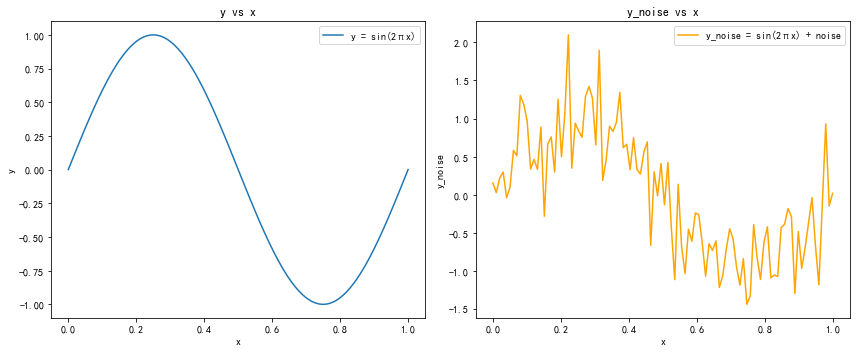

开始训练...
初始学习率: 0.010000
Epoch [100/1000], Loss: 0.170146, LR: 0.010000, Grad Norm: 0.025929
Epoch [200/1000], Loss: 0.167609, LR: 0.005000, Grad Norm: 0.002730
Epoch [300/1000], Loss: 0.167140, LR: 0.005000, Grad Norm: 0.002298
Epoch [400/1000], Loss: 0.166823, LR: 0.002500, Grad Norm: 0.001587
Epoch [500/1000], Loss: 0.166722, LR: 0.002500, Grad Norm: 0.001309
Epoch [600/1000], Loss: 0.166638, LR: 0.001250, Grad Norm: 0.001120
Epoch [700/1000], Loss: 0.166598, LR: 0.001250, Grad Norm: 0.001043
Epoch [800/1000], Loss: 0.166558, LR: 0.000625, Grad Norm: 0.000971
Epoch [900/1000], Loss: 0.166538, LR: 0.000625, Grad Norm: 0.000936
Epoch [1000/1000], Loss: 0.166517, LR: 0.000313, Grad Norm: 0.000903


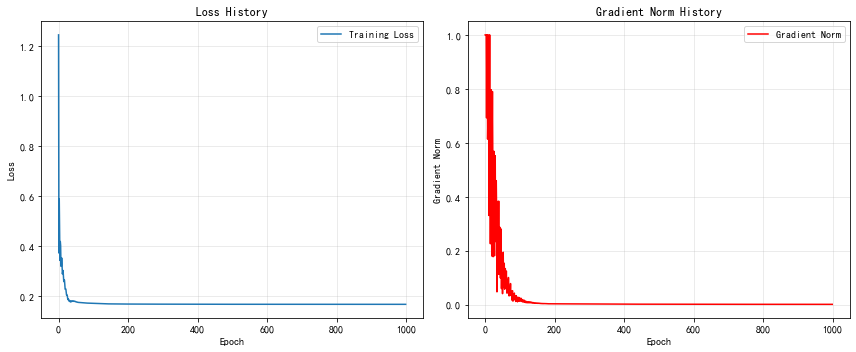

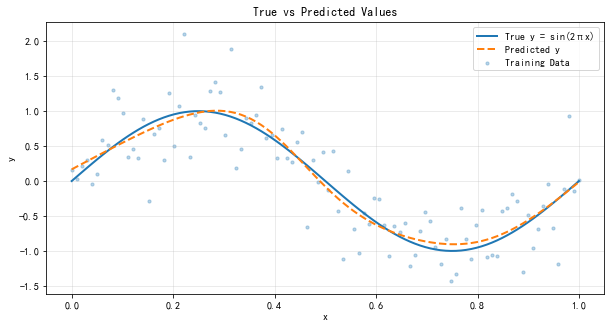

训练MSE: 0.004450

测试模型外推能力
训练区间[0,1] MSE: 0.004361
左外推区间[-1,0] MSE: 4.023240
右外推区间[1,2] MSE: 6.810945


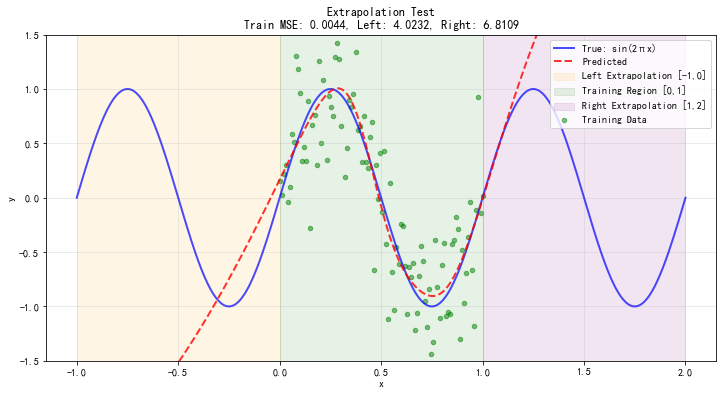


增强模型：添加周期性特征
增强模型 - 训练MSE: 0.046649
增强模型 - 训练区间[0,1] MSE: 0.046666
增强模型 - 左外推区间[-1,0] MSE: 0.080041
增强模型 - 右外推区间[1,2] MSE: 0.101609


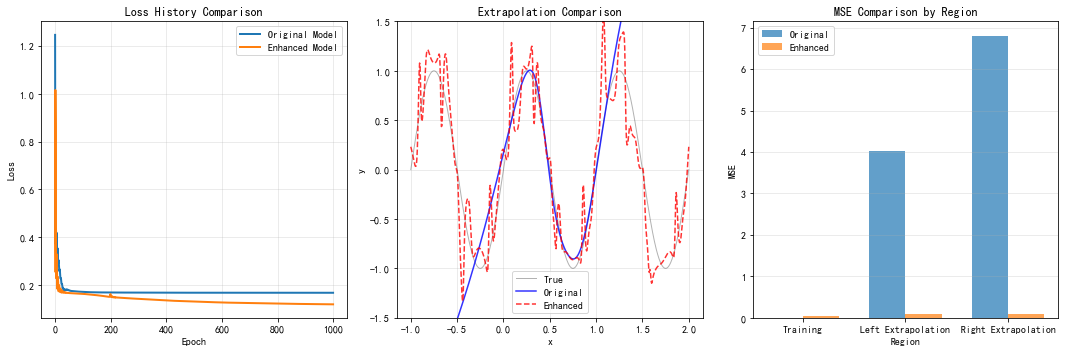


训练完成!
总结:
1. 原始模型训练MSE: 0.004450
2. 增强模型训练MSE: 0.046649
3. 外推能力比较:
   左外推误差比 (原始/增强): 922.47 / 1.72
   右外推误差比 (原始/增强): 1561.65 / 2.18
4. 建议: 使用增强模型可以获得更好的外推能力


In [9]:
'''
A simple example of overfitting using a Multi-Layer Perceptron (MLP) to fit noisy sine wave data.
Author: Dongyang Kuang

NOTE: 
    [] Multiple aspects can be investigated:
'''

#%%
import numpy as np
import torch

def sin_2pi_on_grid(x):
    """
    Computes y = sin(2pi*x) on a uniform grid from 0 to 1.

    Parameters:
    x (int or array): input for evaluation.

    Returns:
    y (numpy.ndarray): The computed sine values at the grid points.
    """

    y = np.sin(2 * np.pi * x)  # what if include more periods in [0,1]
    return y

#%%
# Example usage:
num_points = 100 # Are there any sampling method that is more efficient?
x = np.linspace(0, 1, num_points) # what if non-uniform grid?
y = sin_2pi_on_grid(x)

# Add white noise to y
noise_intensity = 0.4
noise = np.random.normal(0, noise_intensity, len(y))
y_noise = y + noise

#%%
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot y vs x on the left subplot
axs[0].plot(x, y, label='y = sin(2πx)')
axs[0].set_title('y vs x')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()

# Plot y_noise vs x on the right subplot
axs[1].plot(x, y_noise, label='y_noise = sin(2πx) + noise', color='orange')
axs[1].set_title('y_noise vs x')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y_noise')
axs[1].legend()

# Display the plots
plt.tight_layout()
plt.show()


#%%
import torch.nn as nn
import torch.optim as optim

# 改进的MLP模型 - 使用更稳定的设计
class StableMLP(nn.Module):
    def __init__(self, hidden_units=32):
        super(StableMLP, self).__init__()
        # 增加层数但减少每层单元数，有助于更好的泛化
        self.hidden1 = nn.Linear(1, hidden_units)
        self.hidden2 = nn.Linear(hidden_units, hidden_units)
        self.output = nn.Linear(hidden_units, 1)
        
        # 使用更稳定的激活函数组合
        self.activation1 = nn.Tanh()
        self.activation2 = nn.Tanh()
        
        # 更好的初始化
        self._initialize_weights()
    
    def _initialize_weights(self):
        # Xavier初始化，适合Tanh
        nn.init.xavier_uniform_(self.hidden1.weight, gain=5/3)  # Tanh的增益
        nn.init.xavier_uniform_(self.hidden2.weight, gain=5/3)
        nn.init.xavier_uniform_(self.output.weight)
        
        # 偏置初始化为小的正值
        nn.init.zeros_(self.hidden1.bias)
        nn.init.zeros_(self.hidden2.bias)
        nn.init.zeros_(self.output.bias)
    
    def forward(self, x):
        # 归一化输入到[-1, 1]范围
        x_norm = 2 * x - 1
        
        x = self.activation1(self.hidden1(x_norm))
        x = self.activation2(self.hidden2(x))
        x = self.output(x)
        return x

#%%
# Prepare the data
USE_NOISE = True
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
if USE_NOISE:
    y_tensor = torch.tensor(y_noise, dtype=torch.float32).view(-1, 1)
else:
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

#%%
# Initialize the model, loss function, and optimizer
model = StableMLP(hidden_units=64)  # 增加隐藏单元数
criterion = nn.MSELoss()

# 使用AdamW，初始学习率设为0.01，然后通过调度器调整
optimizer = optim.AdamW(model.parameters(), lr=0.01, weight_decay=1e-3)  # 增加权重衰减

# 使用StepLR调度器 - 更稳定的选择
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=200, gamma=0.5)

# 添加梯度监控
def get_gradient_norm(model):
    total_norm = 0.0
    for p in model.parameters():
        if p.grad is not None:
            param_norm = p.grad.data.norm(2)
            total_norm += param_norm.item() ** 2
    return total_norm ** 0.5

# Training loop
loss_history = []
grad_norm_history = []
num_epochs = 1000

print("开始训练...")
print(f"初始学习率: {optimizer.param_groups[0]['lr']:.6f}")

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    
    # 梯度裁剪，防止梯度爆炸
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    
    # 记录梯度范数
    grad_norm = get_gradient_norm(model)
    grad_norm_history.append(grad_norm)
    
    optimizer.step()
    
    # 更新学习率
    scheduler.step()
    
    loss_history.append(loss.item())
    
    # 每100个epoch打印一次，并显示学习率
    if (epoch+1) % 100 == 0:
        current_lr = optimizer.param_groups[0]['lr']
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}, '
              f'LR: {current_lr:.6f}, Grad Norm: {grad_norm:.6f}')
    
# Plot the loss history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history, label='Training Loss')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(grad_norm_history, label='Gradient Norm', color='red')
plt.title('Gradient Norm History')
plt.xlabel('Epoch')
plt.ylabel('Gradient Norm')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    predicted = model(x_tensor).numpy()

#%%
# Plot the true values and the predicted values
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='True y = sin(2πx)', linewidth=2)
plt.plot(x, predicted, label='Predicted y', linestyle='--', linewidth=2)
plt.scatter(x, y_noise if USE_NOISE else y, s=10, alpha=0.3, label='Training Data')
plt.title('True vs Predicted Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 计算训练误差
train_mse = np.mean((predicted.squeeze() - y)**2)
print(f"训练MSE: {train_mse:.6f}")

# 测试外推能力
print("\n" + "="*80)
print("测试模型外推能力")
print("="*80)

# 生成外推数据
x_extrapolate = np.linspace(-1, 2, 600)
y_true_extrapolate = sin_2pi_on_grid(x_extrapolate)

# 模型在外推数据上的预测
with torch.no_grad():
    x_tensor_extrapolate = torch.tensor(x_extrapolate, dtype=torch.float32).view(-1, 1)
    y_pred_extrapolate = model(x_tensor_extrapolate).numpy().squeeze()

# 计算各区域误差
mask_train = (x_extrapolate >= 0) & (x_extrapolate <= 1)
mask_extrapolate_left = (x_extrapolate >= -1) & (x_extrapolate < 0)
mask_extrapolate_right = (x_extrapolate > 1) & (x_extrapolate <= 2)

mse_train = np.mean((y_pred_extrapolate[mask_train] - y_true_extrapolate[mask_train])**2)
mse_left = np.mean((y_pred_extrapolate[mask_extrapolate_left] - y_true_extrapolate[mask_extrapolate_left])**2)
mse_right = np.mean((y_pred_extrapolate[mask_extrapolate_right] - y_true_extrapolate[mask_extrapolate_right])**2)

print(f"训练区间[0,1] MSE: {mse_train:.6f}")
print(f"左外推区间[-1,0] MSE: {mse_left:.6f}")
print(f"右外推区间[1,2] MSE: {mse_right:.6f}")

# 绘制外推结果
plt.figure(figsize=(12, 6))
plt.plot(x_extrapolate, y_true_extrapolate, 'b-', label='True: sin(2πx)', linewidth=2, alpha=0.7)
plt.plot(x_extrapolate, y_pred_extrapolate, 'r--', label='Predicted', linewidth=2, alpha=0.8)

# 标记不同区域
plt.axvspan(-1, 0, alpha=0.1, color='orange', label='Left Extrapolation [-1,0]')
plt.axvspan(0, 1, alpha=0.1, color='green', label='Training Region [0,1]')
plt.axvspan(1, 2, alpha=0.1, color='purple', label='Right Extrapolation [1,2]')

# 添加训练数据点
plt.scatter(x, y_noise if USE_NOISE else y, s=20, alpha=0.5, color='green', label='Training Data')

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Extrapolation Test\nTrain MSE: {mse_train:.4f}, Left: {mse_left:.4f}, Right: {mse_right:.4f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-1.5, 1.5)
plt.show()

# 如果需要更好的外推能力，可以尝试使用周期性特征
print("\n" + "="*80)
print("增强模型：添加周期性特征")
print("="*80)

# 创建增强模型
class EnhancedMLP(nn.Module):
    def __init__(self, hidden_units=32):
        super(EnhancedMLP, self).__init__()
        # 输入维度为3：[x, sin(2πx), cos(2πx)]
        self.hidden1 = nn.Linear(3, hidden_units)
        self.hidden2 = nn.Linear(hidden_units, hidden_units)
        self.output = nn.Linear(hidden_units, 1)
        self.activation = nn.Tanh()
        
        # 初始化
        nn.init.xavier_uniform_(self.hidden1.weight, gain=5/3)
        nn.init.xavier_uniform_(self.hidden2.weight, gain=5/3)
        nn.init.xavier_uniform_(self.output.weight)
        nn.init.zeros_(self.hidden1.bias)
        nn.init.zeros_(self.hidden2.bias)
        nn.init.zeros_(self.output.bias)
    
    def forward(self, x):
        # 创建周期性特征
        x_sin = torch.sin(2 * np.pi * x)
        x_cos = torch.cos(2 * np.pi * x)
        x_combined = torch.cat([x, x_sin, x_cos], dim=1)
        
        x = self.activation(self.hidden1(x_combined))
        x = self.activation(self.hidden2(x))
        x = self.output(x)
        return x

# 训练增强模型
enhanced_model = EnhancedMLP(hidden_units=64)
optimizer_enhanced = optim.AdamW(enhanced_model.parameters(), lr=0.01, weight_decay=1e-3)
scheduler_enhanced = optim.lr_scheduler.StepLR(optimizer_enhanced, step_size=200, gamma=0.5)

enhanced_loss_history = []
for epoch in range(num_epochs):
    enhanced_model.train()
    optimizer_enhanced.zero_grad()
    outputs = enhanced_model(x_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    torch.nn.utils.clip_grad_norm_(enhanced_model.parameters(), max_norm=1.0)
    optimizer_enhanced.step()
    scheduler_enhanced.step()
    enhanced_loss_history.append(loss.item())

# 测试增强模型
enhanced_model.eval()
with torch.no_grad():
    enhanced_pred = enhanced_model(x_tensor).numpy().squeeze()
    enhanced_pred_extrapolate = enhanced_model(x_tensor_extrapolate).numpy().squeeze()

enhanced_mse_train = np.mean((enhanced_pred - y)**2)
enhanced_mse_extrapolate_train = np.mean((enhanced_pred_extrapolate[mask_train] - y_true_extrapolate[mask_train])**2)
enhanced_mse_left = np.mean((enhanced_pred_extrapolate[mask_extrapolate_left] - y_true_extrapolate[mask_extrapolate_left])**2)
enhanced_mse_right = np.mean((enhanced_pred_extrapolate[mask_extrapolate_right] - y_true_extrapolate[mask_extrapolate_right])**2)

print(f"增强模型 - 训练MSE: {enhanced_mse_train:.6f}")
print(f"增强模型 - 训练区间[0,1] MSE: {enhanced_mse_extrapolate_train:.6f}")
print(f"增强模型 - 左外推区间[-1,0] MSE: {enhanced_mse_left:.6f}")
print(f"增强模型 - 右外推区间[1,2] MSE: {enhanced_mse_right:.6f}")

# 绘制对比图
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(loss_history, label='Original Model', linewidth=2)
plt.plot(enhanced_loss_history, label='Enhanced Model', linewidth=2)
plt.title('Loss History Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(x_extrapolate, y_true_extrapolate, 'k-', label='True', alpha=0.3, linewidth=1)
plt.plot(x_extrapolate, y_pred_extrapolate, 'b-', label='Original', alpha=0.8)
plt.plot(x_extrapolate, enhanced_pred_extrapolate, 'r--', label='Enhanced', alpha=0.8)
plt.title('Extrapolation Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-1.5, 1.5)

plt.subplot(1, 3, 3)
labels = ['Training', 'Left Extrapolation', 'Right Extrapolation']
original_mse = [mse_train, mse_left, mse_right]
enhanced_mse = [enhanced_mse_extrapolate_train, enhanced_mse_left, enhanced_mse_right]

x_pos = np.arange(len(labels))
width = 0.35

plt.bar(x_pos - width/2, original_mse, width, label='Original', alpha=0.7)
plt.bar(x_pos + width/2, enhanced_mse, width, label='Enhanced', alpha=0.7)

plt.xlabel('Region')
plt.ylabel('MSE')
plt.title('MSE Comparison by Region')
plt.xticks(x_pos, labels)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("训练完成!")
print("="*80)
print("总结:")
print(f"1. 原始模型训练MSE: {train_mse:.6f}")
print(f"2. 增强模型训练MSE: {enhanced_mse_train:.6f}")
print(f"3. 外推能力比较:")
print(f"   左外推误差比 (原始/增强): {mse_left/mse_train:.2f} / {enhanced_mse_left/enhanced_mse_extrapolate_train:.2f}")
print(f"   右外推误差比 (原始/增强): {mse_right/mse_train:.2f} / {enhanced_mse_right/enhanced_mse_extrapolate_train:.2f}")
print(f"4. 建议: 使用增强模型可以获得更好的外推能力")

ReduceLROnPlateau: verbose 参数不受支持，已使用无 verbose 的构造。
Epoch 1/1000, train_loss=0.415419, val_loss=0.548765, grad_norm=0.959183
Epoch 11/1000, train_loss=0.207606, val_loss=0.228736, grad_norm=0.582551
Epoch 50/1000, train_loss=0.129312, val_loss=0.120968, grad_norm=0.252189
Epoch 100/1000, train_loss=0.083999, val_loss=0.075053, grad_norm=0.277344
Epoch 101/1000, train_loss=0.083314, val_loss=0.072613, grad_norm=0.450562
Epoch 150/1000, train_loss=0.063050, val_loss=0.055077, grad_norm=0.680496
Epoch 200/1000, train_loss=0.052046, val_loss=0.041026, grad_norm=0.900909
Epoch 250/1000, train_loss=0.049406, val_loss=0.035909, grad_norm=0.260067
Epoch 300/1000, train_loss=0.046451, val_loss=0.032891, grad_norm=0.869815
LR reduced: 0.001 -> 0.0005 at epoch 332
Epoch 350/1000, train_loss=0.045230, val_loss=0.033289, grad_norm=0.558897
LR reduced: 0.0005 -> 0.00025 at epoch 373
Epoch 400/1000, train_loss=0.039526, val_loss=0.032504, grad_norm=0.377909
Epoch 401/1000, train_loss=0.045224, val_lo

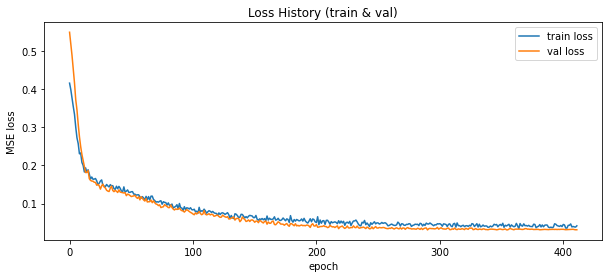

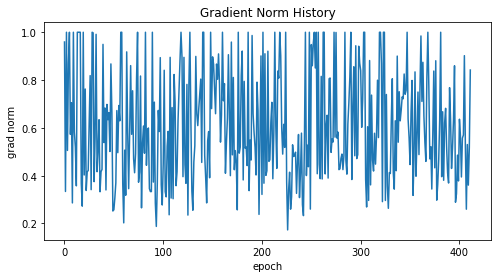

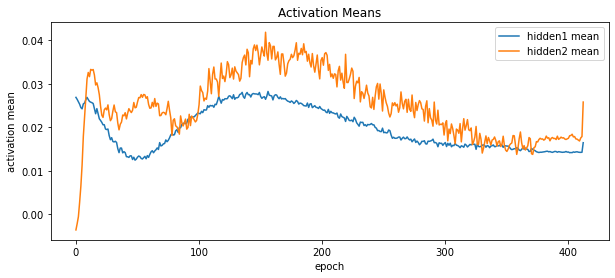

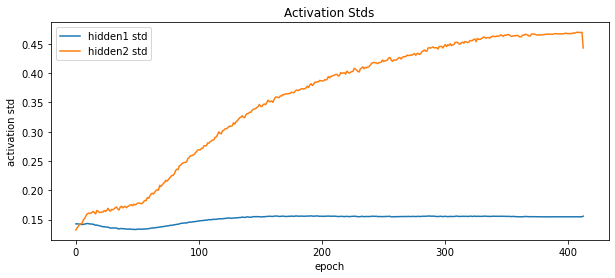

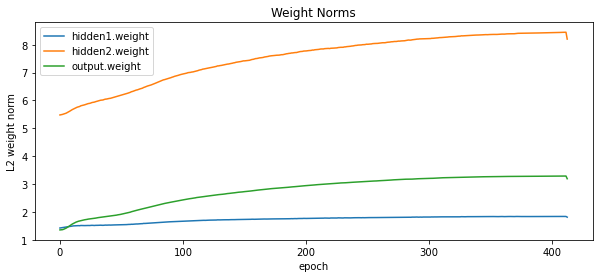

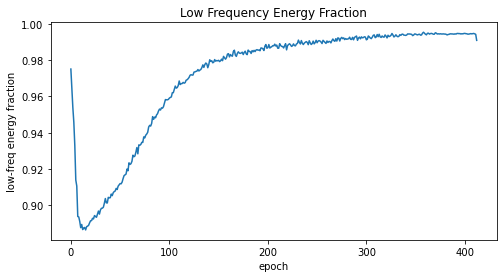

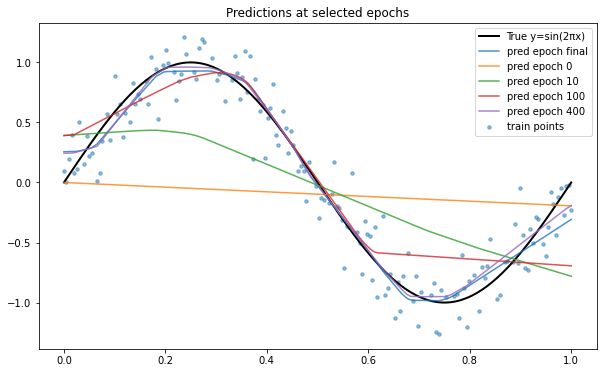

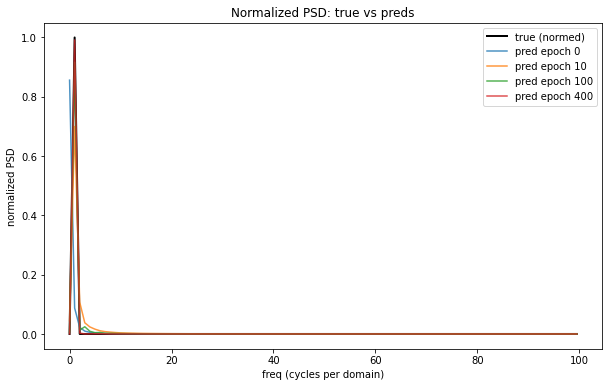

Training and diagnostics complete.


In [6]:
"""
train_with_diagnostics.py

完整可运行脚本：训练一个小 MLP 拟合 y = sin(2πx)（可选加噪），并在训练过程中记录并可视化：
- train/val loss
- 梯度范数
- 权重 L2 范数
- 隐层激活的均值/方差（通过 forward hook）
- 若干 epoch 的预测演化
- 频谱（PSD）分析：低频能量占比随 epoch 的变化与若干 epoch 的谱对比

依赖：numpy, torch, matplotlib
"""
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# ---------- 可配置超参 ----------
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

hidden_units = 32
batch_size = 16
num_epochs = 1000
lr = 1e-3
weight_decay = 1e-4
dropout_p = 0.1
patience_es = 120
grad_clip = 1.0

# ---------- 模型定义 ----------
class MLP(nn.Module):
    def __init__(self, hidden_units=32, dropout_p=0.0, act='relu'):
        super().__init__()
        self.hidden1 = nn.Linear(1, hidden_units)
        self.act1 = nn.ReLU() if act == 'relu' else nn.Tanh()
        self.dropout = nn.Dropout(dropout_p)
        self.hidden2 = nn.Linear(hidden_units, hidden_units)
        self.act2 = nn.ReLU() if act == 'relu' else nn.Tanh()
        self.output = nn.Linear(hidden_units, 1)
    
    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.dropout(x)
        x = self.act2(self.hidden2(x))
        x = self.output(x)
        return x

def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

# ---------- 数据准备（示例：y = sin(2πx) + noise） ----------
n_samples = 200
x = np.linspace(0, 1, n_samples)
y = np.sin(2 * np.pi * x)
noise_std = 0.2
y_noise = y + np.random.normal(scale=noise_std, size=y.shape)

USE_NOISE = True
y_used = y_noise if USE_NOISE else y

X = torch.tensor(x, dtype=torch.float32).view(-1,1)
Y = torch.tensor(y_used, dtype=torch.float32).view(-1,1)

# train/val split
n = len(X)
perm = np.random.permutation(n)
train_idx = perm[: int(0.8*n)]
val_idx = perm[int(0.8*n):]

X_train, Y_train = X[train_idx], Y[train_idx]
X_val, Y_val = X[val_idx], Y[val_idx]

train_ds = TensorDataset(X_train, Y_train)
val_ds = TensorDataset(X_val, Y_val)
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=len(val_ds), shuffle=False)

# ---------- 模型、优化器、调度器 ----------
model = MLP(hidden_units=hidden_units, dropout_p=dropout_p, act='relu').to(device)
model.apply(init_weights)

criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

try:
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',
                                                     factor=0.5, patience=40, verbose=True)
except TypeError:
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',
                                                     factor=0.5, patience=40)
    print("ReduceLROnPlateau: verbose 参数不受支持，已使用无 verbose 的构造。")

# ---------- 诊断监控初始化 ----------
monitor_layer_names = ['hidden1', 'hidden2']  # 要监控的 module 名称（与模型属性一致）

activation_buffer = {}
activation_stats = {name: {'mean': [], 'std': []} for name in monitor_layer_names}
weight_norms_history = []
freq_low_energy_frac = []
grad_norms = []
train_loss_history, val_loss_history = [], []
saved_preds = {}   # 保存若干 epoch 的完整预测（用于绘图与 PSD 分析）

# FFT helpers
def compute_fft_psd(y_signal, dx=1.0):
    n = len(y_signal)
    yf = np.fft.rfft(y_signal)
    psd = (np.abs(yf) ** 2)
    freqs = np.fft.rfftfreq(n, d=dx)
    return freqs, psd

def low_freq_fraction(psd, freqs, cutoff):
    tot = psd.sum()
    if tot == 0:
        return 0.0
    low_mask = freqs <= cutoff
    return float(psd[low_mask].sum() / tot)

dx = x[1] - x[0] if len(x) > 1 else 1.0
fft_cutoff = 3.0  # cycles per domain, 可调整

# hooks 注册（捕获 module 的输出）
hooks = []
def make_hook(name):
    def hook(module, inp, out):
        activation_buffer[name] = out.detach().cpu().numpy()
    return hook

for name, module in model.named_modules():
    if name in monitor_layer_names:
        hooks.append(module.register_forward_hook(make_hook(name)))

# ---------- 函数：在 epoch 结束时运行诊断并返回完整预测 ----------
def epoch_diagnostics_and_record():
    activation_buffer.clear()
    model.eval()
    with torch.no_grad():
        x_tensor = torch.tensor(x, dtype=torch.float32).view(-1,1).to(device)
        y_pred_all = model(x_tensor).cpu().numpy().squeeze()

    # activation stats
    for name in monitor_layer_names:
        arr = activation_buffer.get(name)
        if arr is None:
            activation_stats[name]['mean'].append(np.nan)
            activation_stats[name]['std'].append(np.nan)
        else:
            activation_stats[name]['mean'].append(float(np.mean(arr)))
            activation_stats[name]['std'].append(float(np.std(arr)))

    # weight norms (按每个 weight 参数名)
    wnorms = {}
    for (n,p) in model.named_parameters():
        if p is None:
            continue
        if 'weight' in n:
            wnorms[n] = float(p.detach().cpu().norm().item())
    weight_norms_history.append(wnorms)

    # PSD 低频能量占比
    freqs_pred, psd_pred = compute_fft_psd(y_pred_all, dx=dx)
    frac_low = low_freq_fraction(psd_pred, freqs_pred, fft_cutoff)
    freq_low_energy_frac.append(frac_low)

    return y_pred_all

# ---------- 在训练前保存初始预测（epoch 0）以便比较模型从初始化到训练的演化） ----------
saved_preds[0] = epoch_diagnostics_and_record()

# ---------- 训练循环 ----------
best_val = float('inf')
epochs_no_improve = 0
prev_lr = optimizer.param_groups[0]['lr']

monitor_epochs = [0, 10, 100, 400, num_epochs-1]  # 要保存预测的 epoch（0 已在上面保存）
# 保证监控列表内的 epoch 不重复且排序
monitor_epochs = sorted(set(monitor_epochs))

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        if grad_clip is not None:
            torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
        optimizer.step()
        running_loss += loss.item() * xb.size(0)
    epoch_train_loss = running_loss / len(train_ds)
    train_loss_history.append(epoch_train_loss)

    # record grad norm after last backward (approx)
    total_grad_norm_sq = 0.0
    count = 0
    for p in model.parameters():
        if p.grad is not None:
            g = p.grad.detach()
            total_grad_norm_sq += (g.norm().item() ** 2)
            count += 1
    total_grad_norm = (total_grad_norm_sq ** 0.5) if count > 0 else 0.0
    grad_norms.append(total_grad_norm)

    # validation
    model.eval()
    with torch.no_grad():
        val_losses = []
        if len(val_ds) == 0:
            epoch_val_loss = float('inf')
        else:
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                out = model(xb)
                val_losses.append(criterion(out, yb).item())
            epoch_val_loss = float(np.mean(val_losses)) if len(val_losses) > 0 else float('inf')
        val_loss_history.append(epoch_val_loss)

    # lr scheduler
    scheduler.step(epoch_val_loss)
    new_lr = optimizer.param_groups[0]['lr']
    if new_lr != prev_lr:
        print(f"LR reduced: {prev_lr:.6g} -> {new_lr:.6g} at epoch {epoch+1}")
        prev_lr = new_lr

    # early stopping
    if epoch_val_loss < best_val - 1e-8:
        best_val = epoch_val_loss
        epochs_no_improve = 0
        best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
    else:
        epochs_no_improve += 1

    if epochs_no_improve > patience_es:
        print(f"Early stopping at epoch {epoch+1}, best_val={best_val:.6f}")
        break

    # diagnostics: compute activations/weights/PSD for this epoch and optionally save prediction
    y_pred_all = epoch_diagnostics_and_record()
    # 保存若干监控 epoch 的预测（注意我们已在训练前保存了 epoch 0）
    if epoch in monitor_epochs and epoch != 0:
        saved_preds[epoch] = y_pred_all

    if (epoch+1) % 50 == 0 or epoch in monitor_epochs:
        print(f"Epoch {epoch+1}/{num_epochs}, train_loss={epoch_train_loss:.6f}, val_loss={epoch_val_loss:.6f}, grad_norm={total_grad_norm:.6f}")

# 恢复最佳模型参数（若未找到 best_state 则保持当前模型）
try:
    model.load_state_dict(best_state)
except Exception:
    pass

# 最后运行一次诊断并保存最终预测
saved_preds['final'] = epoch_diagnostics_and_record()

# ---------- 绘图：loss, grad norm, activation stats, weight norms, low-freq fraction, PSDs & preds ----------
plt.figure(figsize=(10,4))
plt.plot(train_loss_history, label='train loss')
plt.plot(val_loss_history, label='val loss')
plt.xlabel('epoch'); plt.ylabel('MSE loss'); plt.legend(); plt.title('Loss History (train & val)')
plt.show()

plt.figure(figsize=(8,4))
plt.plot(grad_norms)
plt.xlabel('epoch'); plt.ylabel('grad norm'); plt.title('Gradient Norm History')
plt.show()

# activation stats
plt.figure(figsize=(10,4))
for name in monitor_layer_names:
    plt.plot(activation_stats[name]['mean'], label=f'{name} mean')
plt.xlabel('epoch'); plt.ylabel('activation mean'); plt.legend(); plt.title('Activation Means')
plt.show()

plt.figure(figsize=(10,4))
for name in monitor_layer_names:
    plt.plot(activation_stats[name]['std'], label=f'{name} std')
plt.xlabel('epoch'); plt.ylabel('activation std'); plt.legend(); plt.title('Activation Stds')
plt.show()

# weight norms (按参数名)
plt.figure(figsize=(10,4))
all_weight_keys = sorted({k for d in weight_norms_history for k in d.keys()})
for k in all_weight_keys:
    vals = [d.get(k, np.nan) for d in weight_norms_history]
    plt.plot(vals, label=k)
plt.xlabel('epoch'); plt.ylabel('L2 weight norm'); plt.legend(); plt.title('Weight Norms')
plt.show()

# low-frequency energy fraction over epochs
plt.figure(figsize=(8,4))
plt.plot(freq_low_energy_frac)
plt.xlabel('epoch'); plt.ylabel('low-freq energy fraction'); plt.title('Low Frequency Energy Fraction')
plt.show()

# 绘制若干 epoch 的预测与真值
plt.figure(figsize=(10,6))
plt.plot(x, y, label='True y=sin(2πx)', lw=2, color='k')
plt.scatter(X_train.cpu().numpy().squeeze(), Y_train.cpu().numpy().squeeze(), s=12, alpha=0.5, label='train points')
# 确保按 epoch 顺序绘制 saved_preds
keys_for_plot = sorted([k for k in saved_preds.keys() if isinstance(k, int) or k == 'final'], key=lambda v: (v!='final', v if isinstance(v,int) else num_epochs+1))
for k in keys_for_plot:
    pred = saved_preds[k]
    label = f'pred epoch {k}'
    plt.plot(x, pred, label=label, alpha=0.8)
plt.legend()
plt.title('Predictions at selected epochs')
plt.show()

# PSD 比较：真值与若干 epoch 的 normalized PSD
plt.figure(figsize=(10,6))
freqs_true, psd_true = compute_fft_psd(y, dx=dx)
plt.plot(freqs_true, psd_true / (psd_true.sum() + 1e-12), label='true (normed)', color='k', linewidth=2)
# 选择若干 saved epochs 来比较频谱
psd_plot_epochs = [k for k in saved_preds.keys() if isinstance(k, int)]
psd_plot_epochs = sorted(psd_plot_epochs)[:6]  # 最多取前几组以免图太乱
for e in psd_plot_epochs:
    pred = saved_preds[e]
    freqs_p, psd_p = compute_fft_psd(pred, dx=dx)
    plt.plot(freqs_p, psd_p / (psd_p.sum() + 1e-12), label=f'pred epoch {e}', alpha=0.8)
plt.xlabel('freq (cycles per domain)'); plt.ylabel('normalized PSD'); plt.legend(); plt.title('Normalized PSD: true vs preds')
plt.show()

# 清理 hooks（可选）
for h in hooks:
    try:
        h.remove()
    except Exception:
        pass

print("Training and diagnostics complete.")
